# Avance 1

## Importación de librerías

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np

## Carga y transformación de datos
**Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code**

In [ ]:
df = pd.read_csv('../data/data_latinoamerica.csv')

**Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas**

In [11]:
#Reviso la cantidad de registros cargados
df.shape

(12216057, 50)

In [12]:
#Reviso la información de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [13]:
#Reviso que la carga se haya realizado correctamente visualizando las primeras 10 filas
df.head(n=10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2020-01-06,AR,Argentina,9.0,0.0,41.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
6,AR,2020-01-07,AR,Argentina,4.0,0.0,45.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
7,AR,2020-01-08,AR,Argentina,3.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
8,AR,2020-01-09,AR,Argentina,0.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
9,AR,2020-01-10,AR,Argentina,1.0,0.0,49.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


## Filtrado de los datos

**Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil**

In [14]:
#Reviso el listado de paises por KEY
df['location_key'].unique()

array(['AR', 'AR_A', 'AR_A_007', ..., 'VE_X', 'VE_Y', 'VE_Z'],
      shape=(12327,), dtype=object)

In [15]:
#Analizo la estructura de los códigos de locación
df.groupby(df['location_key'])['population'].max()

location_key
AR          44938712.0
AR_A         1406584.0
AR_A_007       57411.0
AR_A_014        7315.0
AR_A_021       14850.0
               ...    
VE_U          499049.0
VE_V         4323467.0
VE_X               NaN
VE_Y          167676.0
VE_Z         1422000.0
Name: population, Length: 12327, dtype: float64

Se observa una dependencia jerárquica en los códigos

In [16]:
#Confirmo la dependencia jerárquica entre los códigos, demostrando la existencia de distintos niveles que duplican la información
df['nivel'] = df['location_key'].str.count('_')
df[['location_key','nivel']].drop_duplicates().sort_values('nivel')

,location_key,nivel
0,AR,0
12171462,UY,0
550005,BR,0
6115461,CL,0
6475194,CO,0
...,...,...
20811,AR_A_161,2
19820,AR_A_154,2
3964,AR_A_021,2
2973,AR_A_014,2


Con la dependencia demostrada, decido filtrar por location key

In [17]:
#Creo la variable de filtrado con los key de los paises solicitados
paises_a_filtrar=["CO", "AR", "CL", "MX", "PE", "BR"]

#Filtro según los paises solicitados
df_filtrado= df.loc[df['location_key'].isin(paises_a_filtrar)]

#Pido la cantidad total de filas luego del filtrado
df_filtrado.shape

(5946, 51)

Sobre un total de 12.216.057 filas, quedan 5.946 luego del filtrado por país

**Filtra los datos en fechas mayores a 2021-01-01**

In [18]:
#Creo la variable de filtrado con la fecha
fecha_a_filtrar='2021-01-01'

#Filtro según la fecha
df_filtrado= df_filtrado.loc[df_filtrado['date']>=fecha_a_filtrar]

#Pido la cantidad total de filas luego del filtrado
df_filtrado.shape

(3750, 51)

Luego del nuevo filtrado, se obtienen un total de 3.750 filas

**Compara a nivel de país para llenar valores faltantes**

In [19]:
#Creo la variable para contar la cantidad de registros nulos por país
valores_nulos_por_pais = df_filtrado.groupby('country_name').apply(lambda x: x.isnull().sum())

#Muestro el resultado de la variable creada
valores_nulos_por_pais

C:\Users\loren\AppData\Local\Temp\ipykernel_12296\254299692.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valores_nulos_por_pais = df_filtrado.groupby('country_name').apply(lambda x: x.isnull().sum())


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,nivel
country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,4,4,4,4,4,0,...,0,0,0,0,0,0,0,625,625,0
Brazil,0,0,0,0,2,2,2,2,18,0,...,0,0,0,0,0,0,0,3,3,0
Chile,0,0,0,0,4,4,4,4,14,0,...,0,0,0,0,0,0,0,4,625,0
Colombia,0,0,0,0,4,4,4,4,291,0,...,0,0,0,0,0,0,0,237,237,0
Mexico,0,0,0,0,3,3,3,3,218,0,...,0,0,0,0,0,0,0,625,625,0
Peru,0,0,0,0,4,4,4,4,44,0,...,0,0,0,0,0,0,0,625,625,0


**Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes**

Utilizando un bucle For, completo la lista de columnas a imputar con un promedio de los valores para las variables climáticas y con el valor anterior para los acumulados (por location_key)

In [20]:
# Defino los grupos de columnas según el tipo de dato
columnas_acumuladas = [
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_recovered',
    'cumulative_vaccine_doses_administered'
]

columnas_climaticas = [
    'rainfall_mm',
    'relative_humidity',
    'average_temperature_celsius',
    'minimum_temperature_celsius',
    'maximum_temperature_celsius'
]

# Itero país por país para imputar valores
for pais in paises_a_filtrar:
    mask = df_filtrado['location_key'] == pais

    # --- 1. Variables acumuladas ---
    # Se completan con el último valor válido hacia adelante. Esto preserva la naturaleza acumulativa de la serie temporal
    df_filtrado.loc[mask, columnas_acumuladas] = (
        df_filtrado.loc[mask, columnas_acumuladas]
        .ffill()
    )

    # --- 2. Variables climáticas ---
    # Se completan con la media del país. Esto mantiene coherencia en caso de datos faltantes puntuales
    for col in columnas_climaticas:
        media_pais = df_filtrado.loc[mask, col].mean()
        df_filtrado.loc[mask, col] = df_filtrado.loc[mask, col].fillna(media_pais)


Utilizando un bucle For, completo los valores faltanes en las columnas especificadas, con cero

In [21]:
# Imputamos valores faltantes con 0 en columnas específicas
columnas_a_llenar_con_cero = ['new_confirmed', 'new_deceased', 'new_recovered']

for columna in columnas_a_llenar_con_cero:
    df_filtrado[columna] = df_filtrado [columna].fillna(0)

Verificación del cambio en las columnas imputadas

In [22]:
#Verifico la información final del DataFrame
print(df_filtrado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 366 to 10253876
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3750 non-null   object 
 1   date                                   3750 non-null   object 
 2   country_code                           3750 non-null   object 
 3   country_name                           3750 non-null   object 
 4   new_confirmed                          3750 non-null   float64
 5   new_deceased                           3750 non-null   float64
 6   cumulative_confirmed                   3750 non-null   float64
 7   cumulative_deceased                    3750 non-null   float64
 8   cumulative_vaccine_doses_administered  3642 non-null   float64
 9   population                             3750 non-null   float64
 10  population_male                        3750 non-null   float64
 11  pop

**Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza**

## Guardado de DataFrame filtrado

In [ ]:
#Guardo el DataFrame limpio en un nuevo archivo CSV
df_filtrado.to_csv('../data/DatosFinalesFiltrado.csv', index=False)

## Anáisis a partir del DataSet ya filtrado

Carga del nuevo DataSet ya filtrado

In [ ]:
df_limpio = pd.read_csv('../data/DatosFinalesFiltrado.csv')

In [25]:
#Verifico las columnas del df limpio
print(df_limpio.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

## Estadísticas y Métricas

**Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default**

In [26]:
# Selecciono solo las columnas numéricas de interés
columnas_numericas = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_density', 'population_urban', 'population_rural',
    'nurses_per_1000', 'physicians_per_1000', 'life_expectancy', 'diabetes_prevalence',
    'smoking_prevalence'
]

# Con un bucle For, calculo estadísticas descriptivas en cada una de las columnas seleccionadas
for col in columnas_numericas:
    print(f"--- {col} ---")
    print("Media:", df_limpio[col].mean())
    print("Mediana:", df_limpio[col].median())
    print("Desvío estándar:", df_limpio[col].std())
    print("Mínimo:", df_limpio[col].min())
    print("Máximo:", df_limpio[col].max())
    print()

--- new_confirmed ---
Media: 13846.620533333333
Mediana: 5102.0
Desvío estándar: 24212.287393216036
Mínimo: -573.0
Máximo: 298408.0

--- new_deceased ---
Media: 275.748
Mediana: 98.0
Desvío estándar: 507.2040080719143
Mínimo: 0.0
Máximo: 11447.0

--- cumulative_confirmed ---
Media: 6786495.4992
Mediana: 3640785.5
Desvío estándar: 8001192.793824149
Mínimo: 971.0
Máximo: 34568833.0

--- cumulative_deceased ---
Media: 192863.5696
Mediana: 139614.0
Desvío estándar: 182912.08558762528
Mínimo: 1.0
Máximo: 685203.0

--- cumulative_vaccine_doses_administered ---
Media: 83091713.00713894
Mediana: 49955599.0
Desvío estándar: 93853024.13063993
Mínimo: 18.0
Máximo: 347868481.0

--- population ---
Media: 77721474.16666667
Mediana: 47910798.0
Desvío estándar: 67137742.833887
Mínimo: 17574003.0
Máximo: 212559409.0

--- population_density ---
Media: 34.26683333333334
Mediana: 25.7345
Desvío estándar: 16.839470603642653
Mínimo: 16.515
Máximo: 66.325

--- population_urban ---
Media: 68339307.83333333
Me

**Crea una función que permita obtener la mediana, varianza y el rango**

In [27]:
#Creo una función que calcula mediana, varianza y rango para una columna numérica de un DataFrame.
def calcular_estadisticas(df, columna):

    mediana = df[columna].median()
    varianza = df[columna].var()
    rango = df[columna].max() - df[columna].min()
    
    return {
       print(f"Columna: {columna}"),
       print(f"  Mediana: {mediana:.2f}"),
       print(f"  Varianza: {varianza:.2f}"),
       print(f"  Rango: {rango:.2f}")
    }

# Pruebo la función con la columna 'population':
resultado = calcular_estadisticas(df_limpio, 'population')


Columna: population
  Mediana: 47910798.00
  Varianza: 4507476512829145.00
  Rango: 194985406.00


# Avance 2

## Importación de librerías

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Estadística

**Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país**

In [29]:
# Con un Bubcle For recorro las columnas numéricas para obtener el describe de cada una
for columna in df_limpio.columns:
    if df_limpio[columna].dtype in ['int64', 'float64']:
        print(columna)
        print(df_limpio[columna].describe())
        print('_' * 40)

new_confirmed
count      3750.000000
mean      13846.620533
std       24212.287393
min        -573.000000
25%        1511.000000
50%        5102.000000
75%       14802.500000
max      298408.000000
Name: new_confirmed, dtype: float64
________________________________________
new_deceased
count     3750.000000
mean       275.748000
std        507.204008
min          0.000000
25%         25.000000
50%         98.000000
75%        311.750000
max      11447.000000
Name: new_deceased, dtype: float64
________________________________________
cumulative_confirmed
count    3.750000e+03
mean     6.786495e+06
std      8.001193e+06
min      9.710000e+02
25%      2.130490e+06
50%      3.640786e+06
75%      6.247634e+06
max      3.456883e+07
Name: cumulative_confirmed, dtype: float64
________________________________________
cumulative_deceased
count      3750.000000
mean     192863.569600
std      182912.085588
min           1.000000
25%       59241.250000
50%      139614.000000
75%      215073.00000

## Indexación de la columna Date

In [30]:
# Convierto la columna "date" del DataFrame en un objeto de tipo fecha (datetime64) para poder trabajar con series temporales
df_limpio['date'] =pd.to_datetime(df_limpio['date'])

# Establezco la columna "date" como índice del DataFrame.
df_limpio.set_index('date', inplace=True)

## Mapa de Correlación

Genero un mapa de calor para visualizar la correlación entre las variables numéricas del DataFrame.

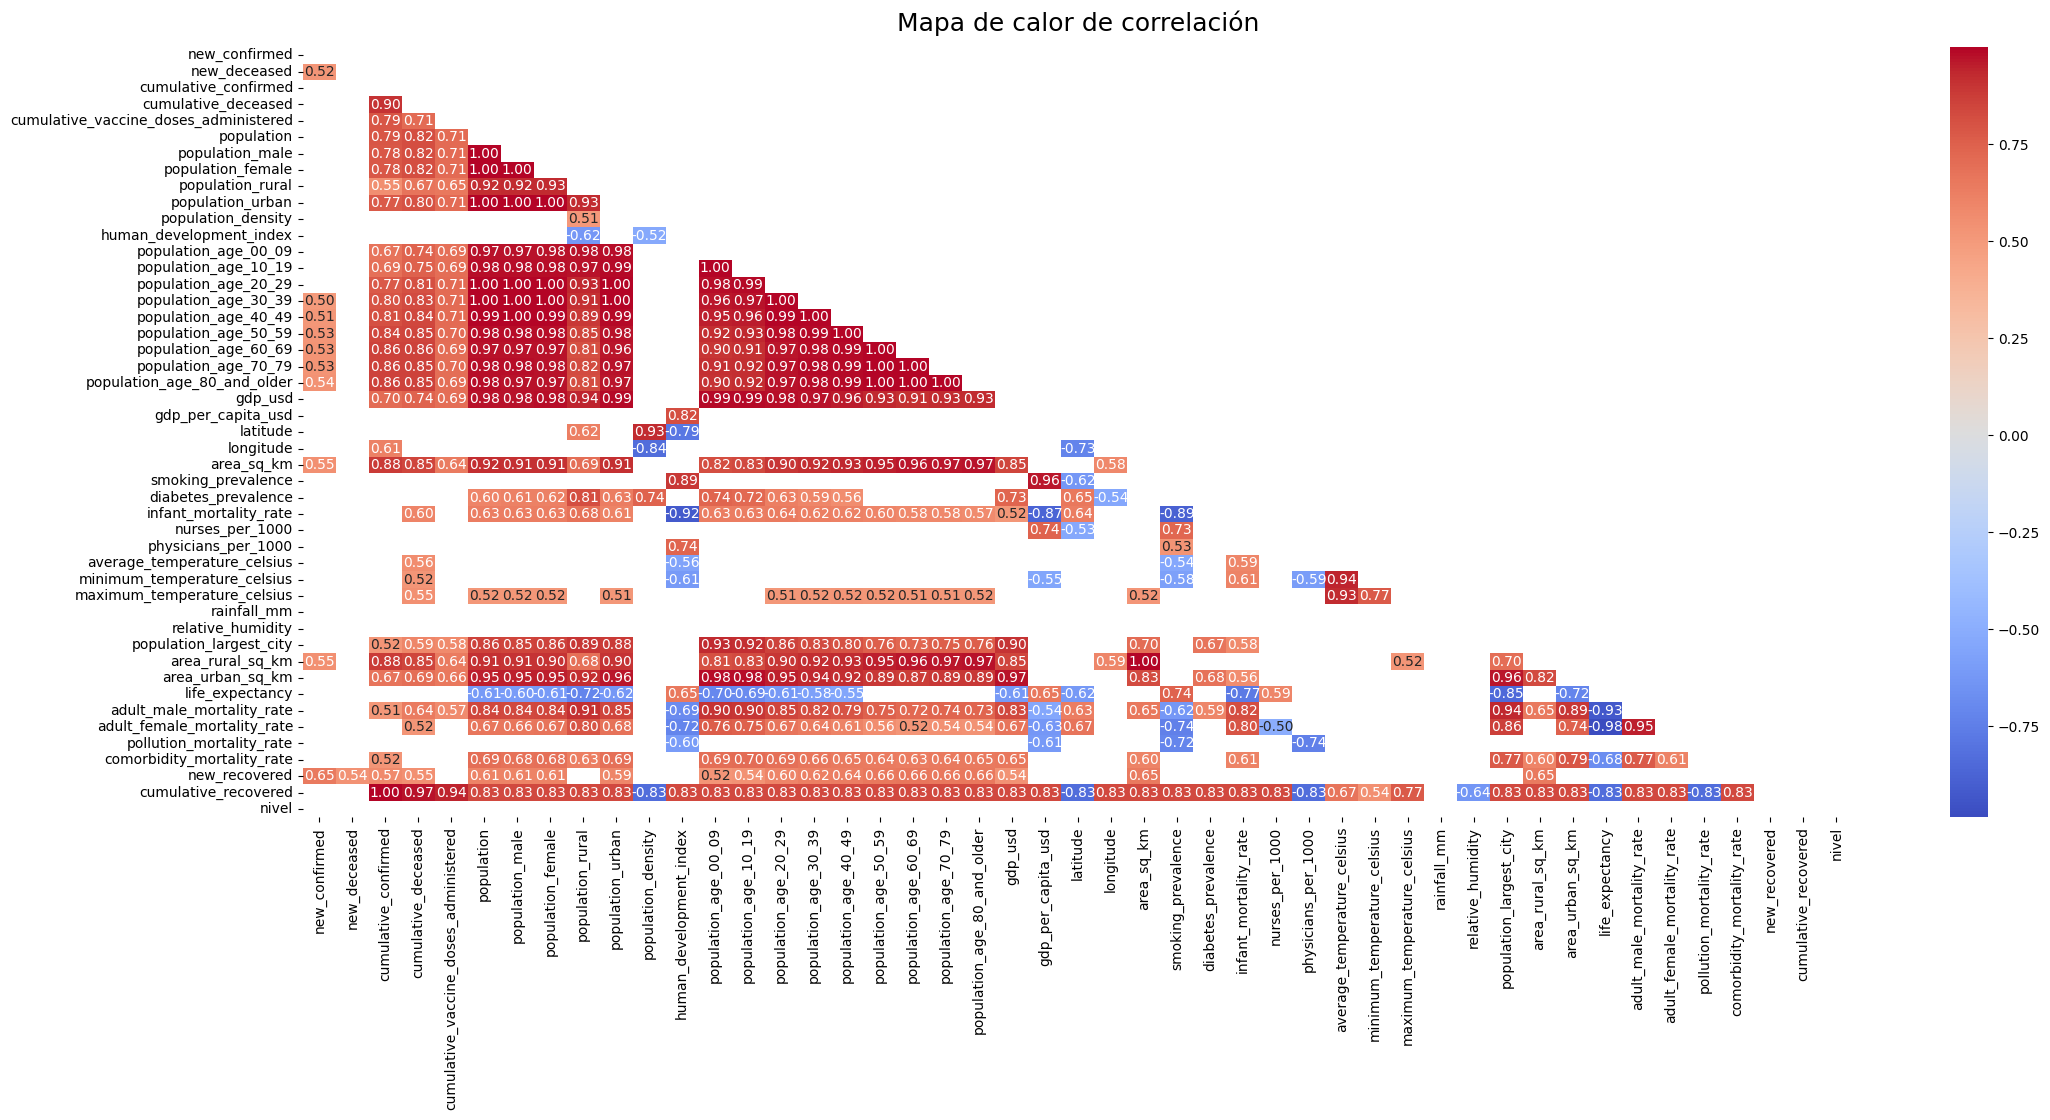

In [31]:
# Selecciono sólo las columnas numéricas
columnas_numericas = df_limpio.select_dtypes(include=[np.number])

# Creo la matriz de correlación
correlacion = columnas_numericas.corr()

#Creo máscara para el triángulo superior
mask = np.triu(np.ones_like(correlacion, dtype=bool))

#   Muestro sólo los valores fuertes (entre -0.5 y 0.5)
correlacion_filtrada = correlacion[abs(correlacion) > 0.5]

# Creo la grafica
plt.figure(figsize=(25, 10))
mapadecalor= sns.heatmap(correlacion_filtrada, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
mapadecalor.set_title('Mapa de calor de correlación', fontdict={'fontsize':18}, pad=12)
plt.show()

Se observa que la administración de vacunas tiene una alta correlación (0.94) con el acumulado de recuperados

**Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones.** Debes incluir:

Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

Gráficos de barras para comparar diferentes regiones.

Mapas de calor para identificar correlaciones entre diferentes variables.

Gráficos de dispersión para explorar posibles relaciones entre las variables.

## Análisis de casos y cuerpo médico por paises

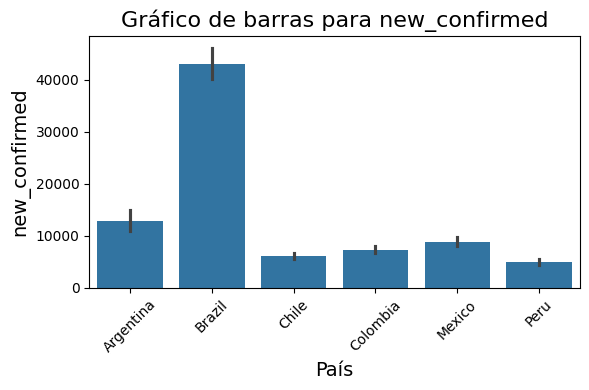

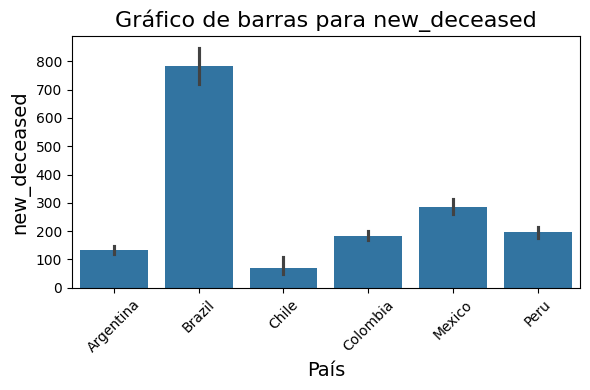

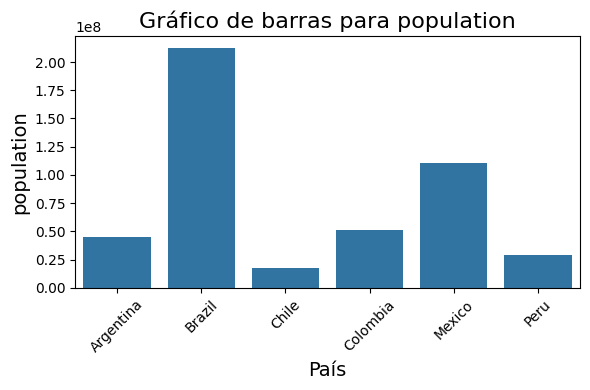

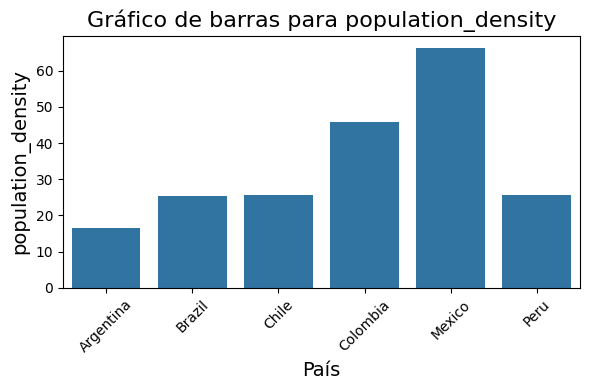

In [32]:
# Diagramas de barras por país

# Selecciono las columnas que voy a incluir en los gráficos
columnas_seleccionadas = ['new_confirmed', 'new_deceased', 'population', 'population_density']

columnas_a_graficar = [col for col in df_limpio.columns if col in columnas_seleccionadas]

# Recorro las columnas a graficar
for columna in columnas_a_graficar: 
    plt.figure(figsize=(6, 4))
    sns.barplot(x='country_name', y=columna, data=df_limpio)
    plt.title(f'Gráfico de barras para {columna}', fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel('País', fontsize=14)
    plt.ylabel(columna, fontsize=14)
    plt.tight_layout()
    plt.show()

Dada la diferencia considerable en la población entre paises, no se puede establecer a partir de los gráficos, una comparativa entre los mismos. 
A continuación calculo una tasa de incidencia per cápita

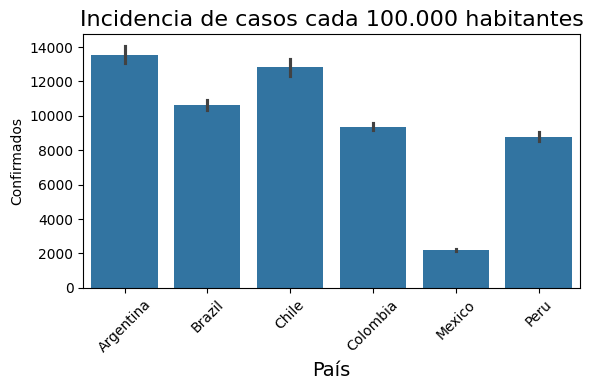

In [33]:
# Calculo la proporción de casos confirmados por cada 100,000 habitantes
incidencia_confirmados = (df_limpio['cumulative_confirmed'] / df_limpio['population']) * 100000

# Grafico con la nueva variable
plt.figure(figsize=(6, 4))
sns.barplot(x='country_name', y=incidencia_confirmados, data=df_limpio)
plt.title(f'Incidencia de casos cada 100.000 habitantes', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('País', fontsize=14)
plt.ylabel('Confirmados', fontsize=10)
plt.tight_layout()
plt.show()

Se observa mayor incidencia de confirmados en Argentica y Chile cada 100.000 habitantes. Quedando Brasil en tercer lugar.

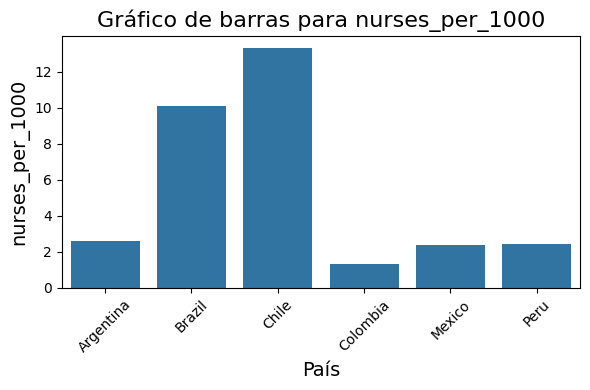

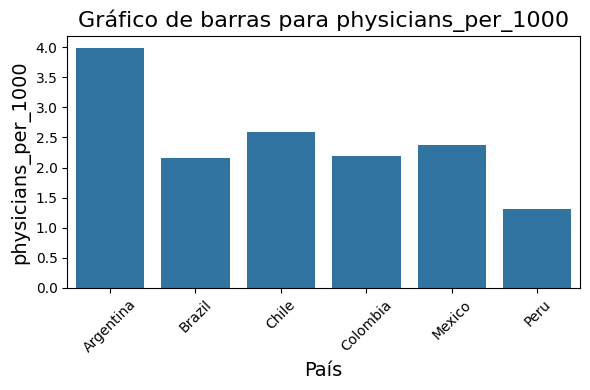

In [34]:
# Repito la operación para ver nos enfermeros y médicos de cada país
# Diagramas de barras por país

# Selecciono las columnas que voy a incluir en los gráficos
columnas_seleccionadas = ['nurses_per_1000', 'physicians_per_1000']

columnas_a_graficar = [col for col in df_limpio.columns if col in columnas_seleccionadas]

# Recorro las columnas a graficar
for columna in columnas_a_graficar: 
    plt.figure(figsize=(6, 4))
    sns.barplot(x='country_name', y=columna, data=df_limpio)
    plt.title(f'Gráfico de barras para {columna}', fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel('País', fontsize=14)
    plt.ylabel(columna, fontsize=14)
    plt.tight_layout()
    plt.show()

Mientras que Brasil y Chile cuentan con una alta cobertura de enfermeros, Argentina es más sólida en cantidad de Médicos.

C:\Users\loren\AppData\Local\Temp\ipykernel_12296\3913663649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='personal_salud_total', data=personal_por_pais, palette='viridis')


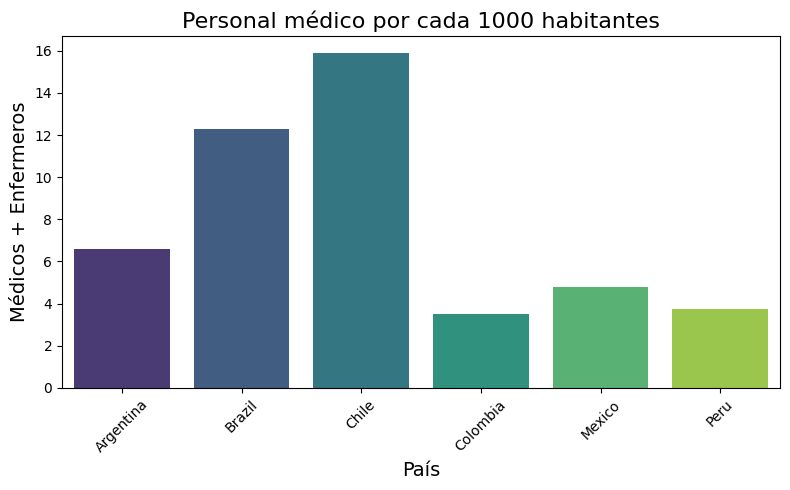

In [35]:
# Calcular personal médico total por país
df_limpio['personal_salud_total'] = df_limpio['nurses_per_1000'] + df_limpio['physicians_per_1000']

personal_por_pais = df_limpio.groupby('country_name')['personal_salud_total'].mean().reset_index()
# uso mean() porque son "por cada 1000 habitantes" (no tiene sentido sumarlos en el tiempo)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x='country_name', y='personal_salud_total', data=personal_por_pais, palette='viridis')
plt.title('Personal médico por cada 1000 habitantes', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('País', fontsize=14)
plt.ylabel('Médicos + Enfermeros', fontsize=14)
plt.tight_layout()
plt.show()

Sin embargo en la sumatoria total del cuerpo médico, Chile alcanza los valores más altos y Argentina queda por detrás de Brasil.

A continuación analizo las muertes de cada país

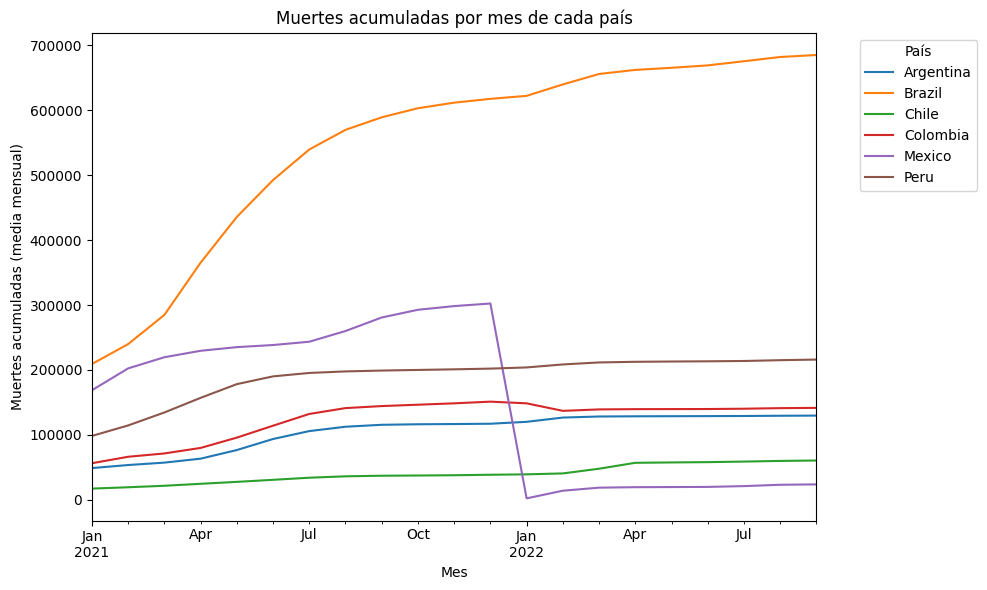

In [36]:
# Gráfica de la evolución mensual de muertes acumuladas por país 
fig, ax = plt.subplots (figsize=(10, 6))

# Iterar sobre cada país y graficar la media mensual de muertes acumuladas
for pais in  df_limpio['country_name'].unique():

    # Filtrar datos por país y hacer resample mensual (fin de mes)
    datos_pais = df_limpio[df_limpio['country_name'] == pais].resample('ME').mean(numeric_only=True)
    # Graficar la serie temporal de muertes acumuladas
    datos_pais['cumulative_deceased'].plot(ax=ax, label=pais)
# Configurar el título y las etiquetas
plt.title('Muertes acumuladas por mes de cada país')
plt.xlabel('Mes')
plt.ylabel('Muertes acumuladas (media mensual)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.tight_layout()
plt.show()

Brasil tiene una alta curva de muertes mientras que en el resto de los paises se logra controlar. México muetra un comportamiento llamativo en Junio del 2022. Podría deberse a errores de información. Tal vez un cambio en la dimensión de registro de los valores.

## Analisis de variables ambientales

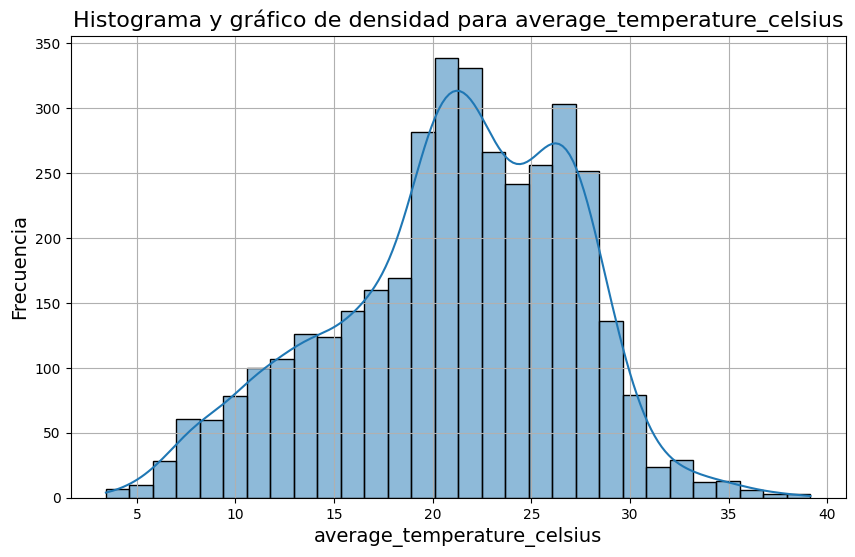

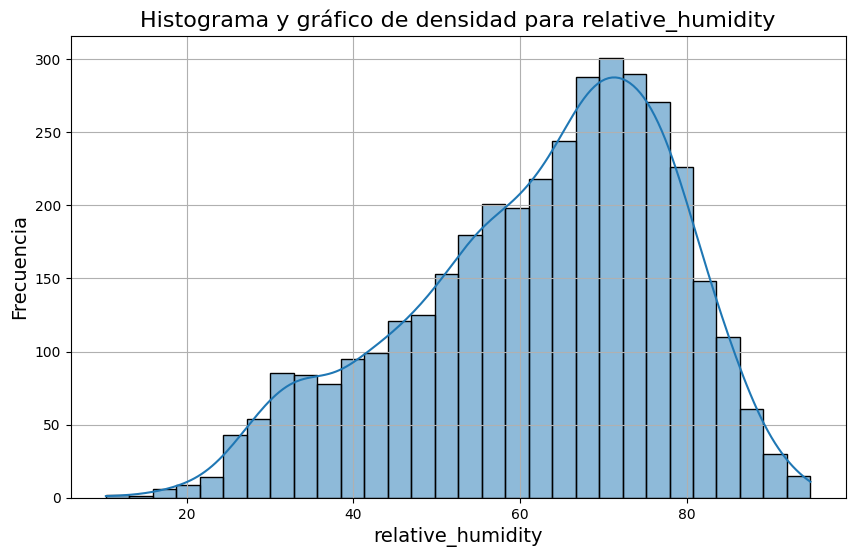

In [37]:
# Lista de columnas para analizar la incidencia de variables ambientales y de salud
columnas_analizar = ['average_temperature_celsius','relative_humidity']
# Recorro las columnas a graficar
for columna in columnas_analizar:   
    plt.figure(figsize=(10, 6))
    sns.histplot(df_limpio[columna], kde=True, bins=30)
    plt.title(f'Histograma y gráfico de densidad para {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True)
    plt.show()

La mayoría de los casos parecen estar agrupados en temperaturas que oscilan entre los 20 y 30 grados con una humedad relativa entre 70 y 80%. A priori creería que es la temperatura y humedad habitual en estos paises.

Reviso las condiciones ambientales por pais

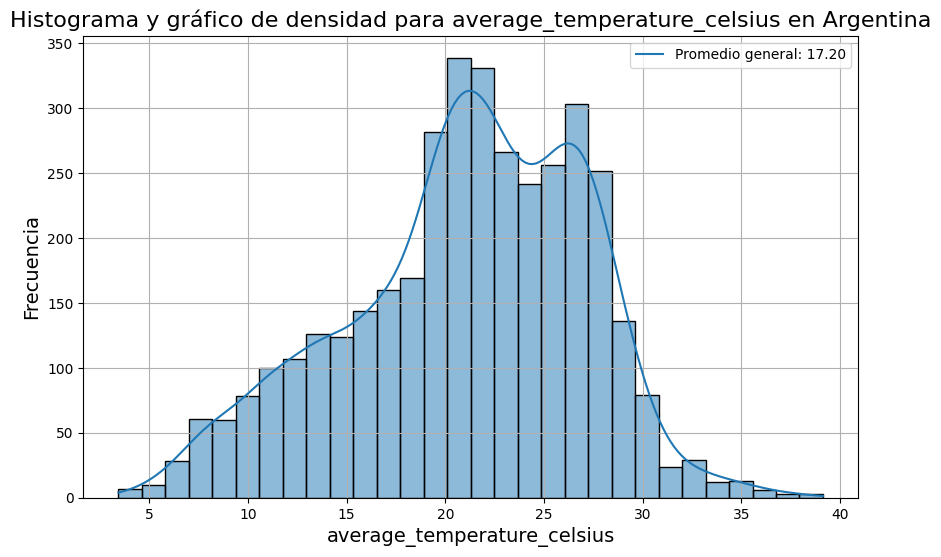

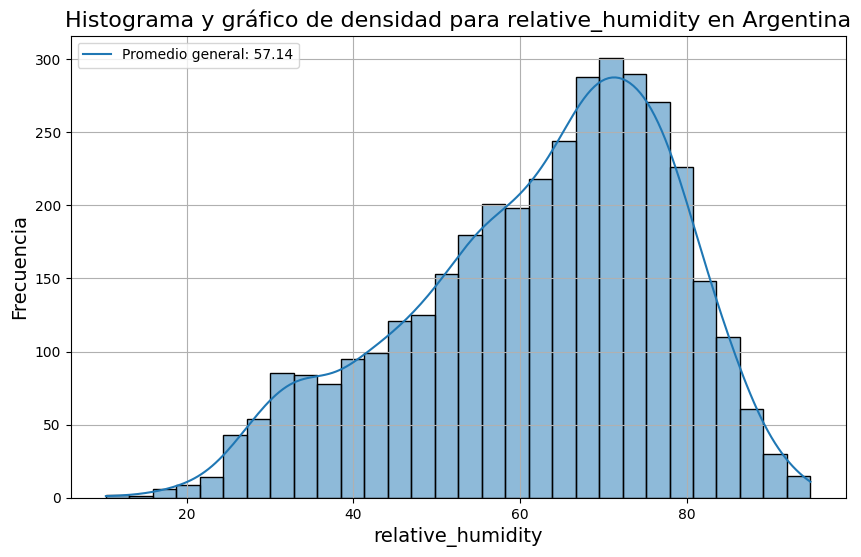

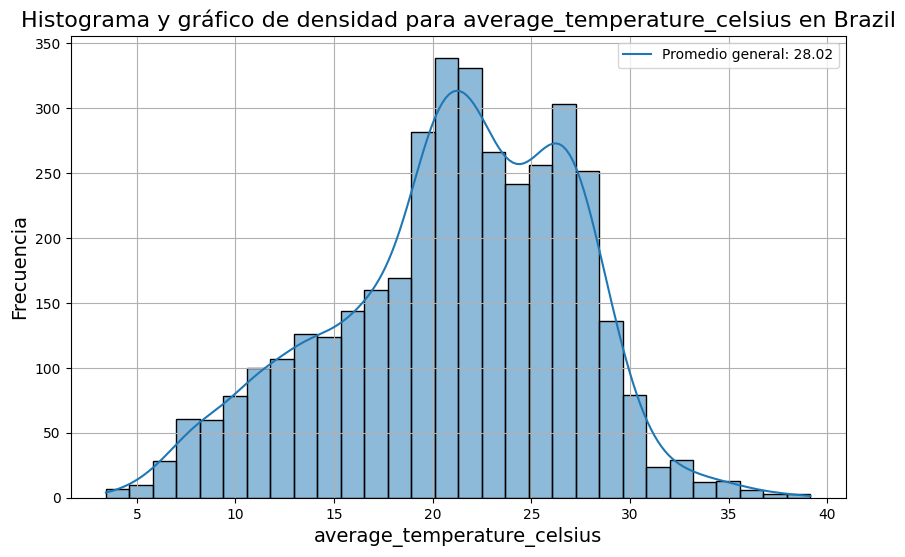

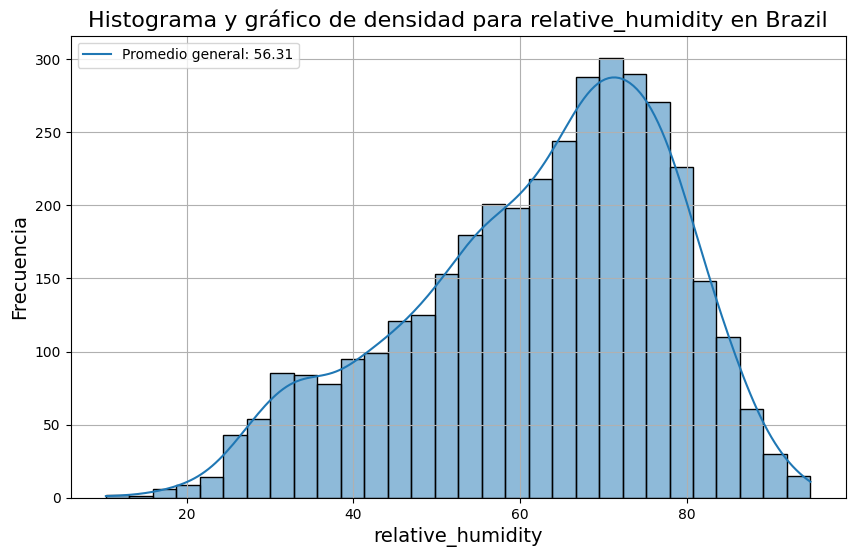

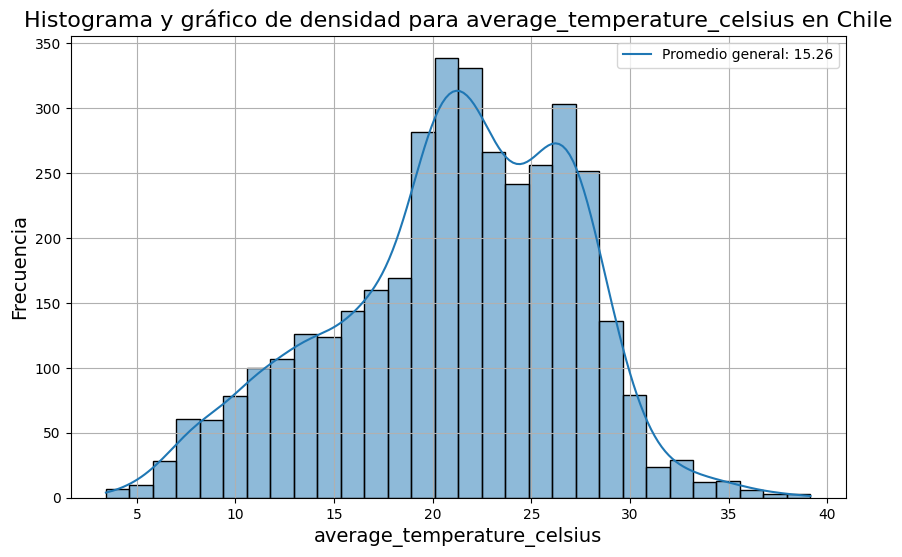

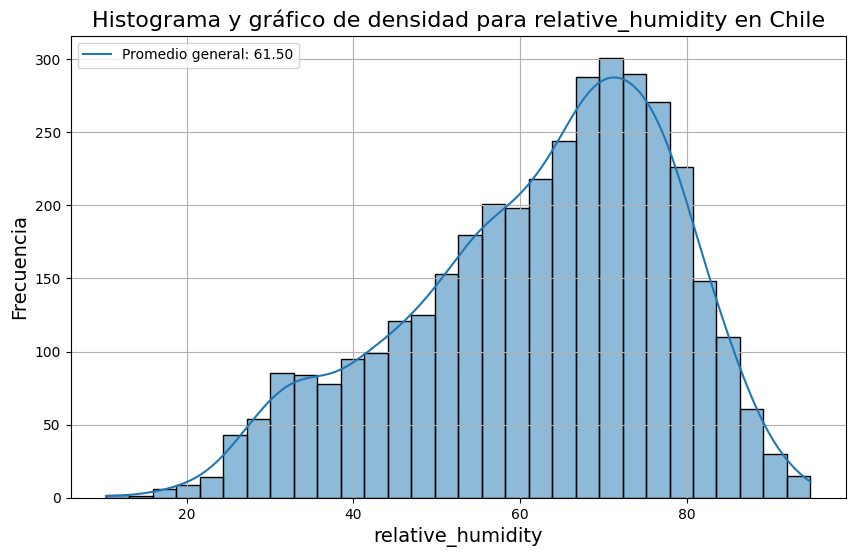

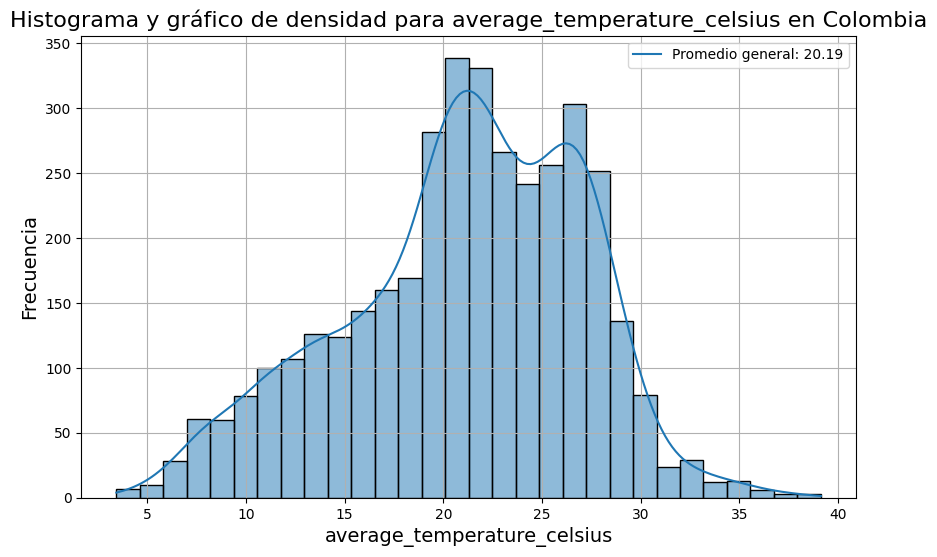

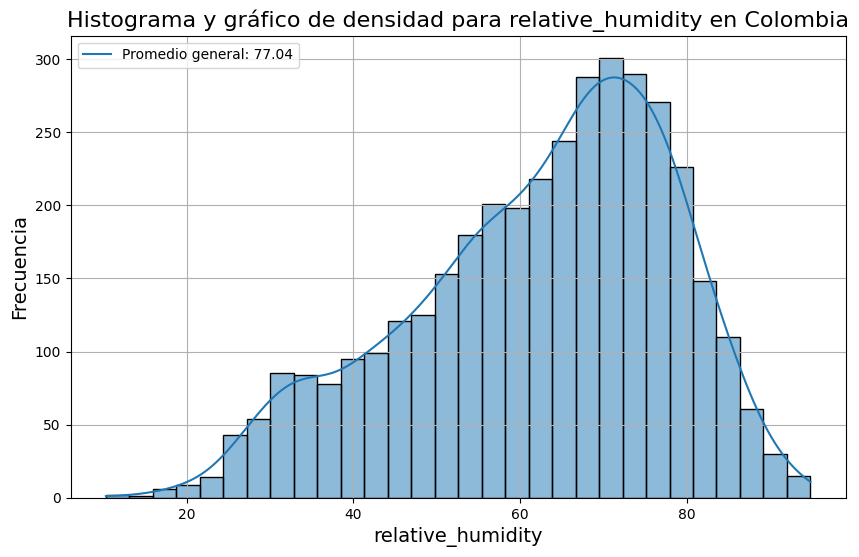

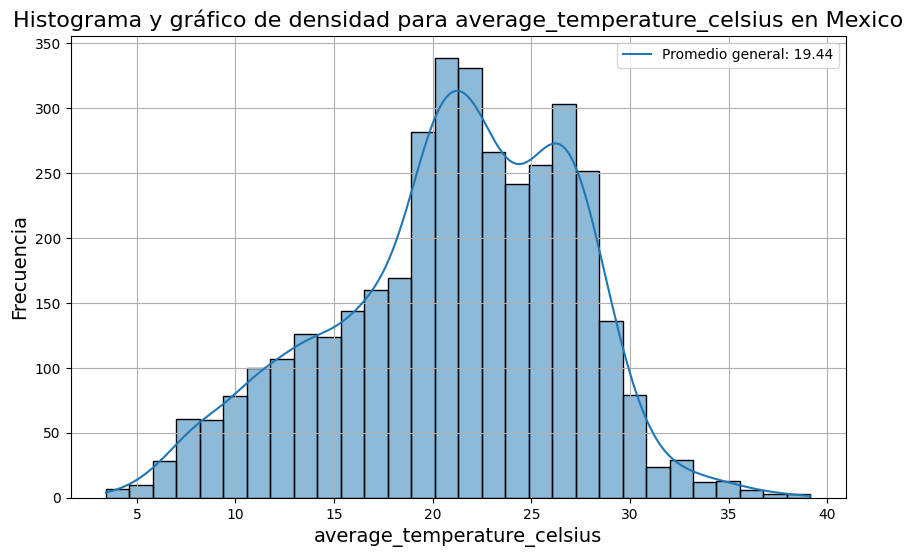

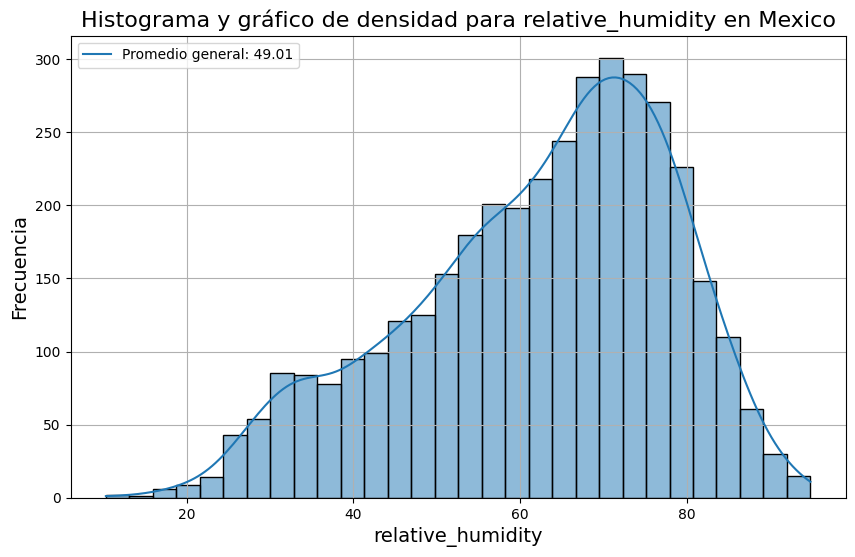

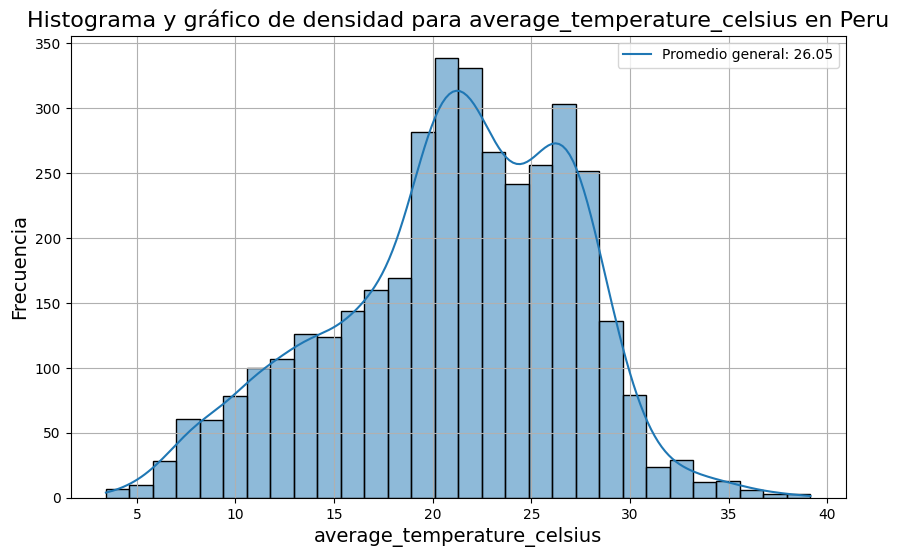

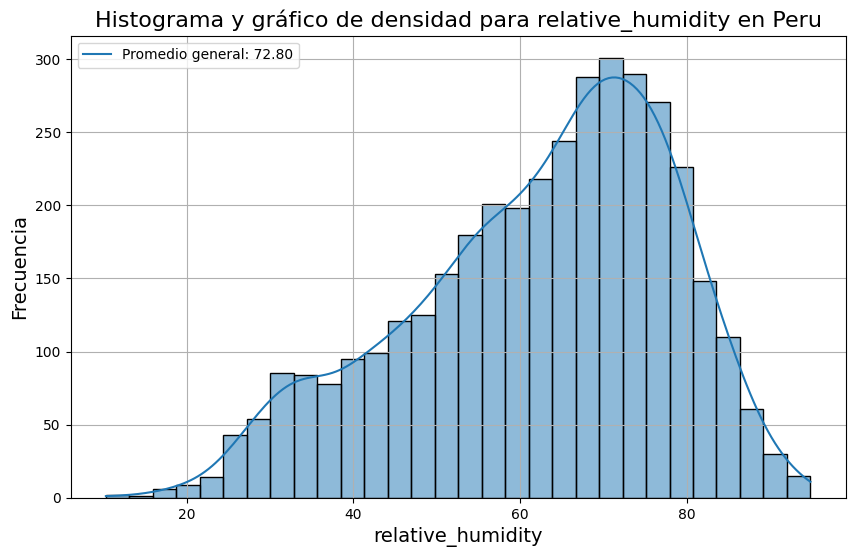

In [38]:
# Lista de columnas para analizar la incidencia de variables ambientales y de salud
columnas_analizar = ['average_temperature_celsius','relative_humidity']


# Iterar por país
for country in df_limpio['country_name'].unique():
    df_country = df_limpio[df_limpio['country_name'] == country]
    promedio_temperatura = df_country['average_temperature_celsius'].mean()
    promedio_humedad = df_country['relative_humidity'].mean()
    # Recorro las columnas a graficar
    for columna in columnas_analizar:   
        plt.figure(figsize=(10, 6))
        sns.histplot(df_limpio[columna], kde=True, bins=30)
        plt.title(f'Histograma y gráfico de densidad para {columna} en {country}' , fontsize=16)
        plt.xlabel(columna, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.legend([f'Promedio general: {promedio_temperatura:.2f}' if columna == 'average_temperature_celsius' else f'Promedio general: {promedio_humedad:.2f}'])
        plt.grid(True)
        plt.show()

Los casos en cada país aparecen reflejados entre los mismos valores de la celda anterior, independientemente de sus propios promedios. Confirmando el rango de temperaturas y humedad de mayor propagación de casos.

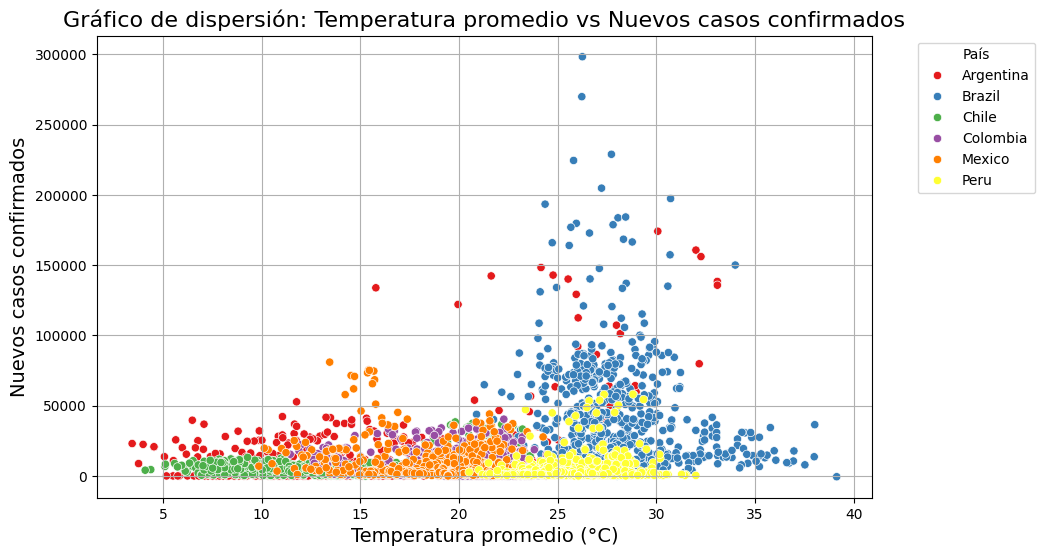

In [39]:
# Graficos de dispersión para analizar la relación entre el promedio de temperatura de cada país identificados por colores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpio, x='average_temperature_celsius', y='new_confirmed', hue='country_name', palette='Set1')
plt.title('Gráfico de dispersión: Temperatura promedio vs Nuevos casos confirmados', fontsize=16)
plt.xlabel('Temperatura promedio (°C)', fontsize=14)
plt.ylabel('Nuevos casos confirmados', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)    

# Avance 3

## EDA con Numpy y Pandas

**Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales.**

## Análisis temporal de casos y vacunas

Analizo la evolución de casos por semana

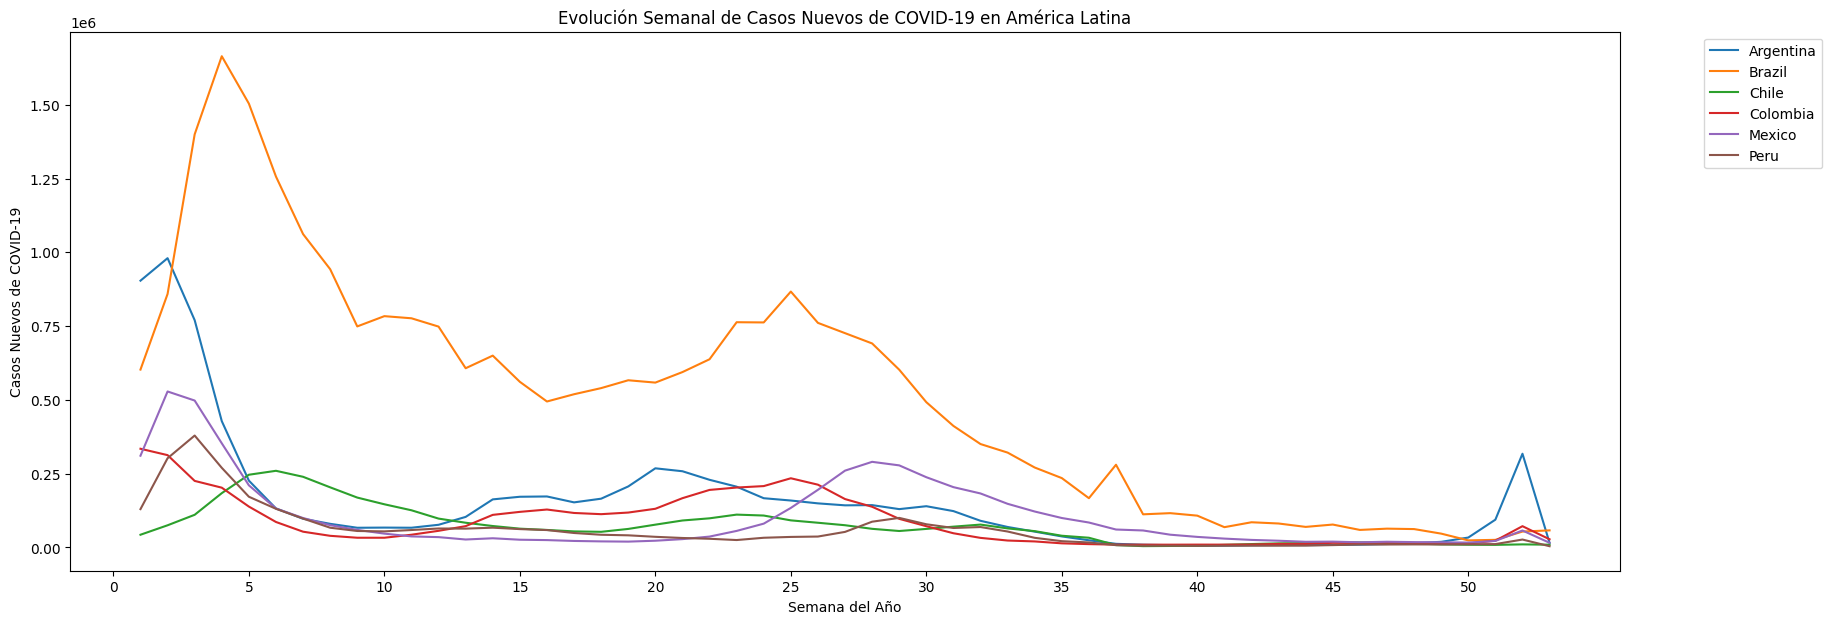

In [40]:
# Analizo cómo evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
df_limpio['week'] = df_limpio.index.isocalendar().week

casos_por_semana = df_limpio.groupby(['country_name',
                                  'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(20, 7))
for country in casos_por_semana['country_name'].unique():
    casos_por_semana_por_pais = casos_por_semana [casos_por_semana ['country_name'] == country]
    plt.plot(casos_por_semana_por_pais['week'], casos_por_semana_por_pais['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')

# Definio ticks de 5 en 5 para aumentar la legibilidad
semanas_min = casos_por_semana['week'].min()
semanas_max = casos_por_semana['week'].max()
plt.xticks(np.arange(semanas_min-1, semanas_max, 5))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mientras a mayoría de los países muestran olas hacia abajo, Brasil obtuvo un pico alrededor de la semana 5. Argentina presenta un rebrote luego de la semana 50.

Evaluación de las dosis administradas de vacunación

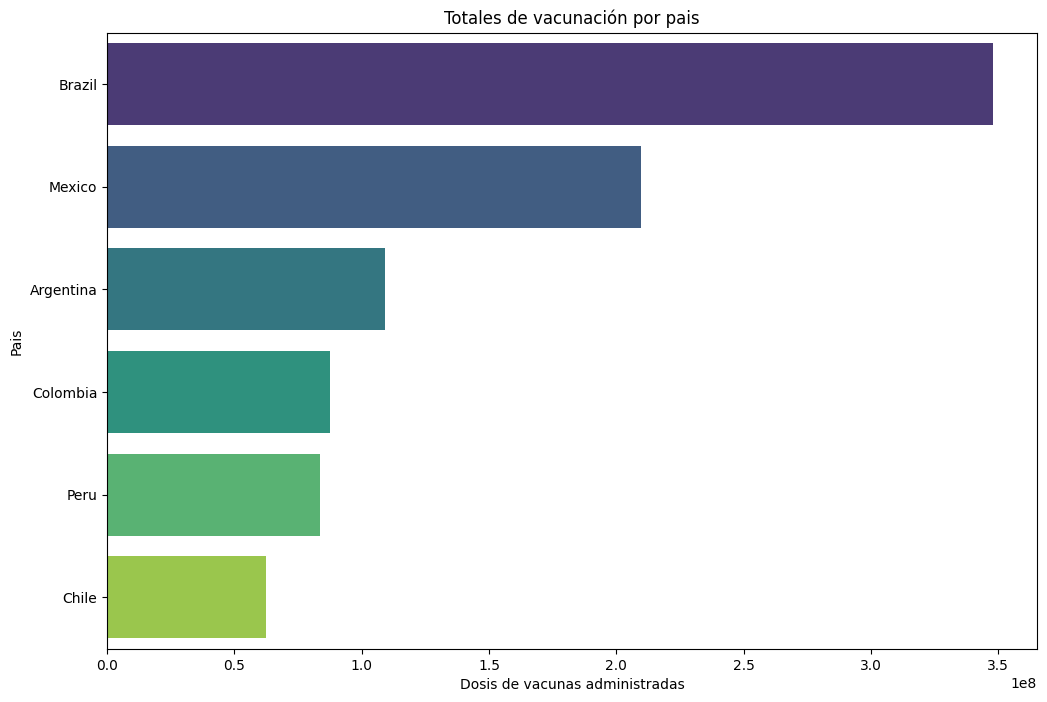

In [41]:
# Valor máximo de dosis de vacunas administradas por país
datos_de_vacunacion = df_limpio.groupby("country_name")['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=datos_de_vacunacion.values, y=datos_de_vacunacion.index, hue=datos_de_vacunacion.index, palette='viridis')

plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Totales de vacunación por pais')
plt.show()

Nuevamente, al ser disímil la cantidad de habitantes, es necesario realizar una exploración basada en tasas per cápita.

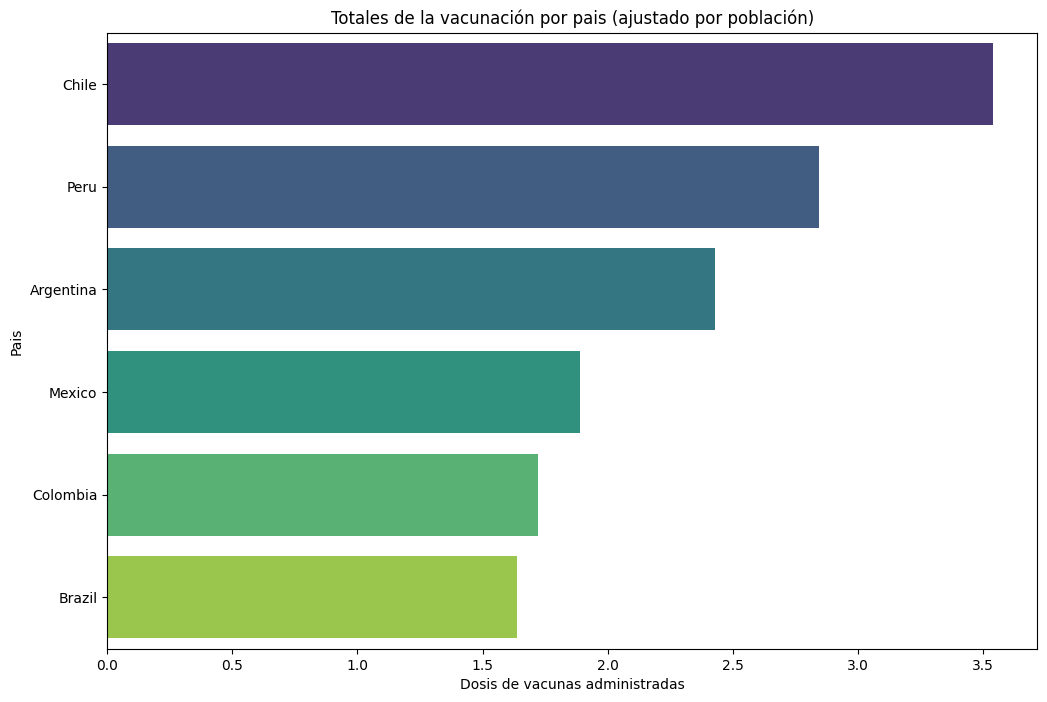

In [42]:
#Calculo la cantidad de dosis de vacuna por habitante hay registradas
estrategia_de_vacunacion = df_limpio.groupby('country_name') ['cumulative_vaccine_doses_administered'].max()/df_limpio.groupby('country_name') ['population'].mean()
estrategia_de_vacunacion=estrategia_de_vacunacion.sort_values (ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=estrategia_de_vacunacion.values, y=estrategia_de_vacunacion.index, hue=estrategia_de_vacunacion.index, palette='viridis')

plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Totales de la vacunación por pais (ajustado por población)')
plt.show()

Chile y Perú dominan en la cantidad de vacunados según su población, mientras que Brasil queda en inferioridad.

Analizo que ocurre con la tasa de letalidad en cada país

C:\Users\loren\AppData\Local\Temp\ipykernel_12296\2554126437.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.loc[g.index.max(), 'tasa_casos_letalidad'])


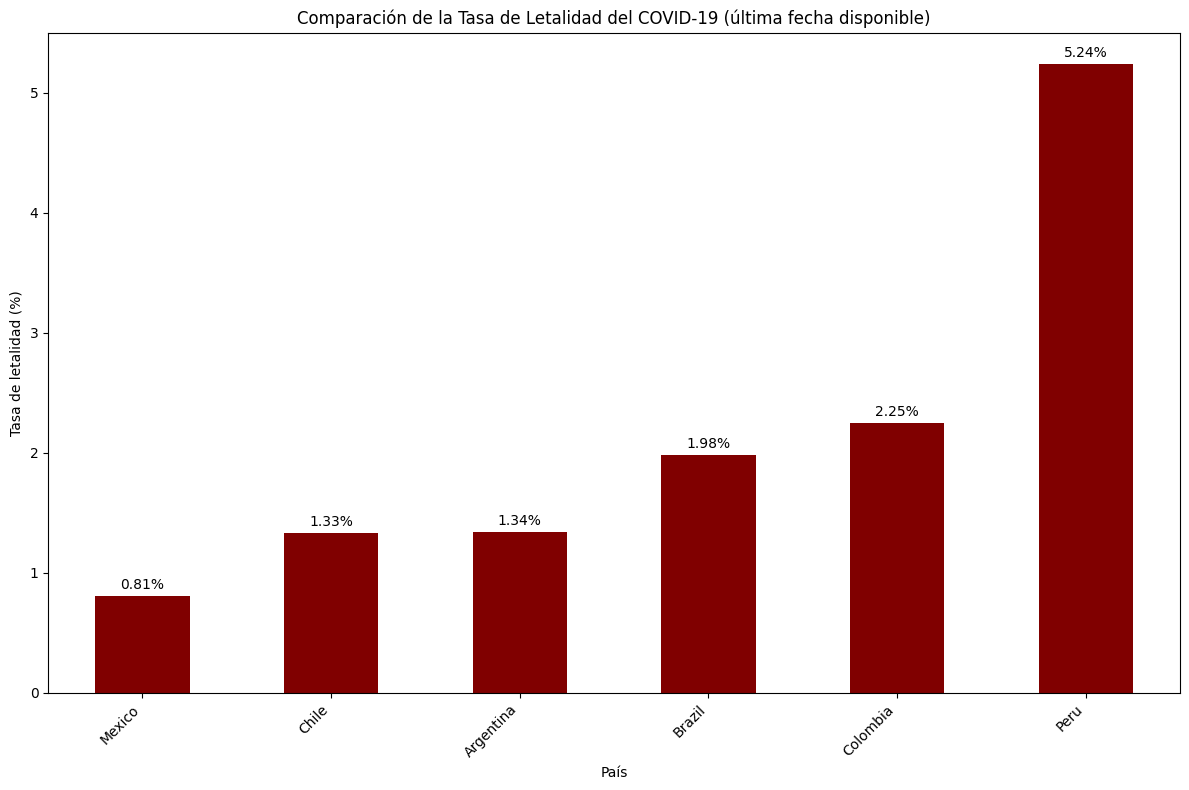

In [43]:
# Calculo la tasa de letalidad como el cociente entre los casos acumulados y los fallecidos acumulados
df_limpio['tasa_casos_letalidad'] = df_limpio['cumulative_deceased'] / df_limpio['cumulative_confirmed']

tasa_letalidad = (
    df_limpio.groupby('country_name')
      .apply(lambda g: g.loc[g.index.max(), 'tasa_casos_letalidad'])
      .sort_values()
) * 100

ax = tasa_letalidad.plot(kind='bar', color='maroon', figsize=(12, 8))
ax.set_xlabel('País')
ax.set_ylabel('Tasa de letalidad (%)')
ax.set_title('Comparación de la Tasa de Letalidad del COVID-19 (última fecha disponible)')

# Etiquetas con el valor exacto
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pese a que Perú tiene una alta dosis de vacunas suministradas, la tasa de letalidad en este país es muy alta. Aun así la cantidad de casos fue disminuyendo a lo largo de las semanas.
Según los gráficos desarrollados anteriormente, Perú no muestra una alta densidad poblacional. Sin embargo su cobertura total del cuerpo médico es de las más bajas. Aun así la cantidad de casos fue disminuyendo a lo largo de las semanas.

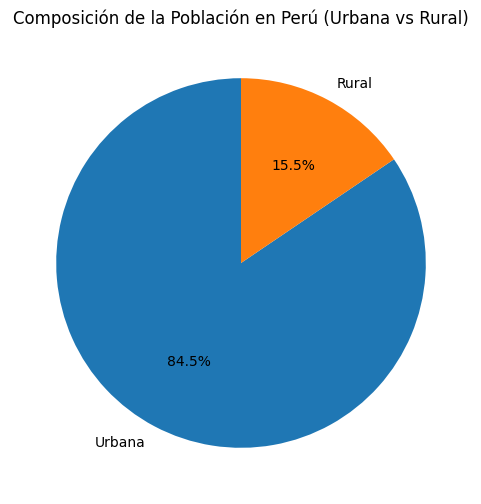

In [44]:
# Composición de la población urbana y rural en Perú
poblacion = {
    'Urbana': df_limpio['population_urban'].mean(),
    'Rural': df_limpio['population_rural'].mean()
}

# Gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(poblacion.values(),
        labels=poblacion.keys(),
        autopct='%1.1f%%',  # mostrar porcentajes
        startangle=90,      # comienza desde arriba
        colors=['#1f77b4', '#ff7f0e'])
plt.title('Composición de la Población en Perú (Urbana vs Rural)')
plt.show()

La mayoría de la población de Perú es urbana, no podría inferirse que haya problemas de administración de dosis o inconvenientes de traslado de los pacientes hacia los centros de atención

Empieza a ser necesaria buscar una relación entre las vacunas aplicadas y los resultados en cuanto a disminución de casos y muertes. Para establecer una medida pareja para todos los paises, trabajaré con tasas respecto de la publación total.

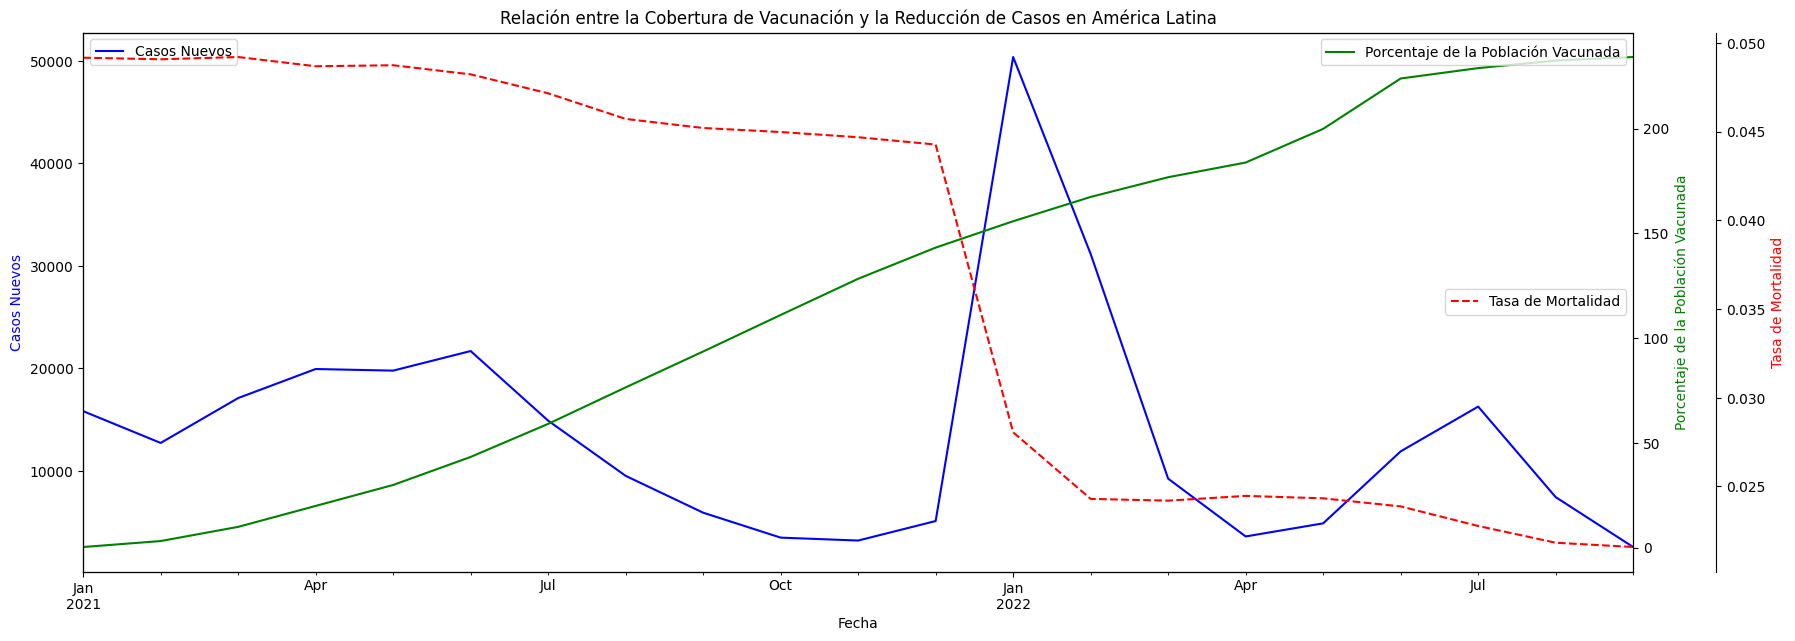

In [45]:
# Grafico con 3 ejes para analizar la relación entre la vacunación, los casos nuevos y la tasa de mortalidad. Cada uno con sus escalas
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax3 = ax1.twinx() 

#creo porcentajes de vacunacion y tasa de mortalidad
df_limpio['percentage_vaccinated'] = (df_limpio['cumulative_vaccine_doses_administered'] / df_limpio['population'] * 100)
df_limpio['mortality_rate'] = df_limpio['cumulative_deceased'] /df_limpio['cumulative_confirmed']
                                      
df_limpio.resample('ME').mean(numeric_only=True) ['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
df_limpio.resample('ME').mean(numeric_only=True) ['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')
df_limpio.resample('ME').mean(numeric_only=True) ['mortality_rate'].plot(ax=ax3, color='red', label='Tasa de Mortalidad', linestyle='--')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax3.set_ylabel('Tasa de Mortalidad', color='red')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')
ax3.spines['right'].set_position(('outward', 60))

plt.show()

En la totalidad de los paises parece haber un pico de casos hacia Junio 2022, no obstante, el marcado ascenso de dosis de vacunas administradas, refleja una disminución significativa en la cantidad de muertes.

Analizaré las mismas curvas pero por país

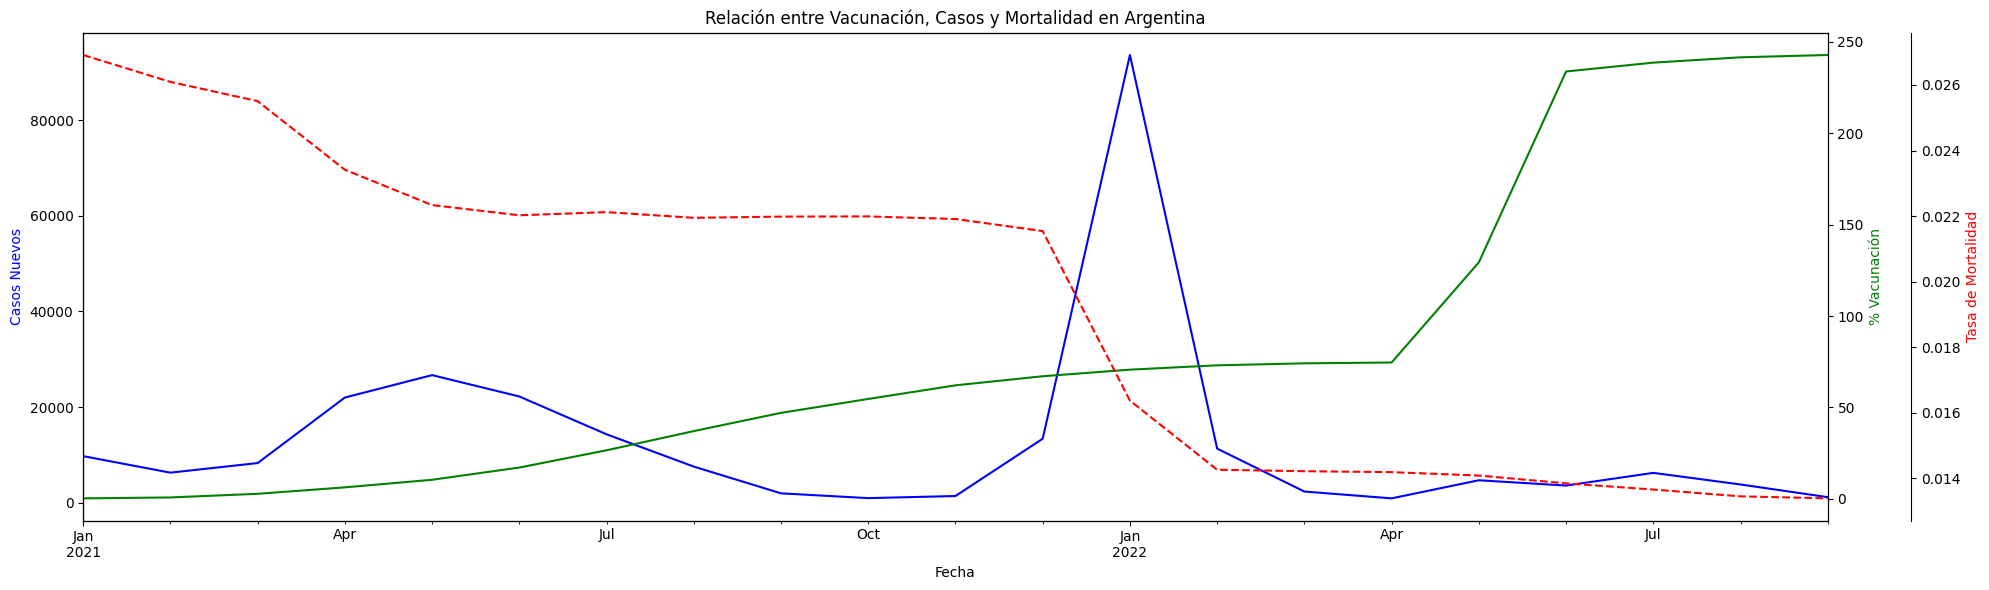

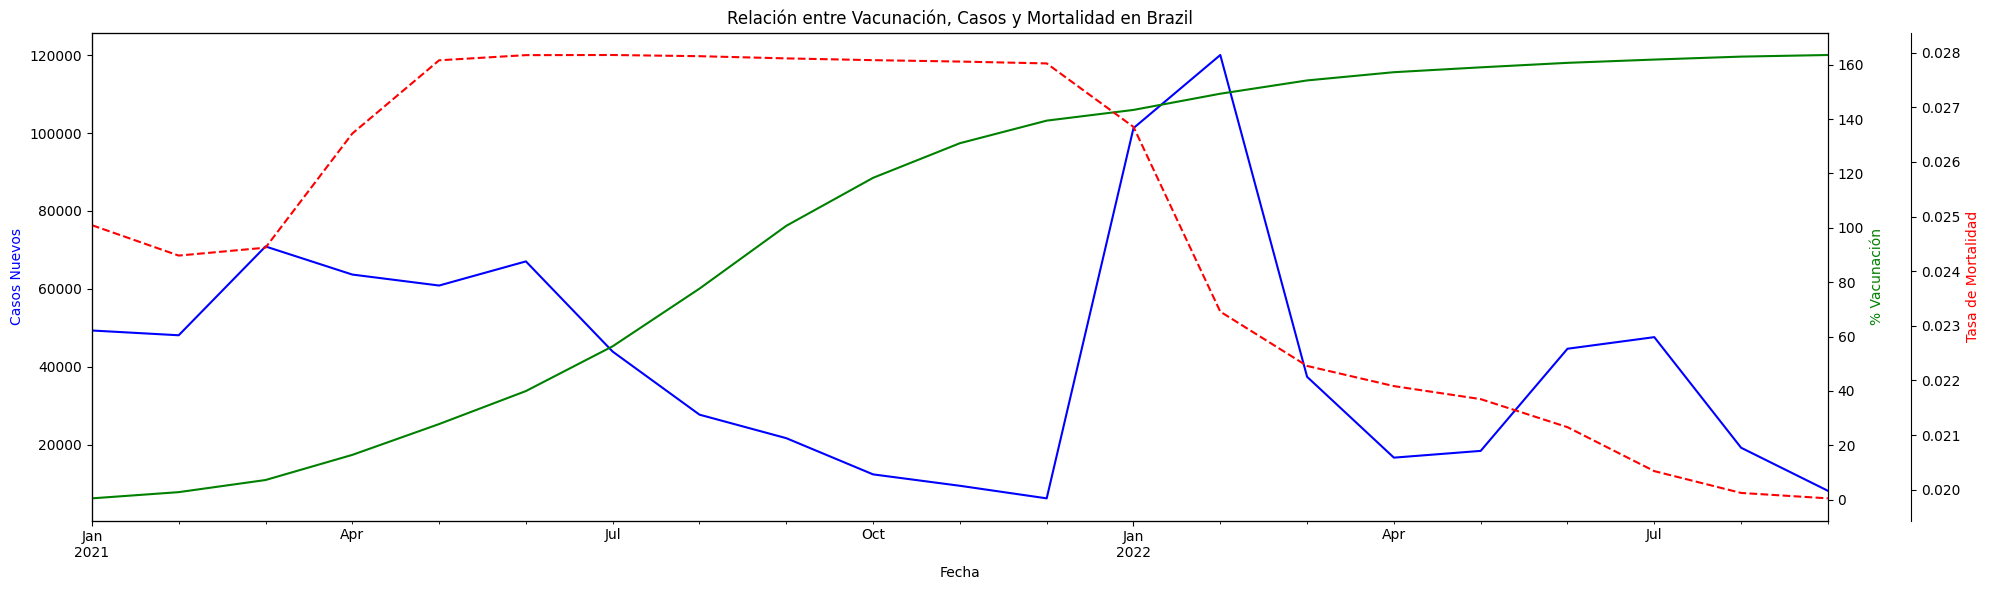

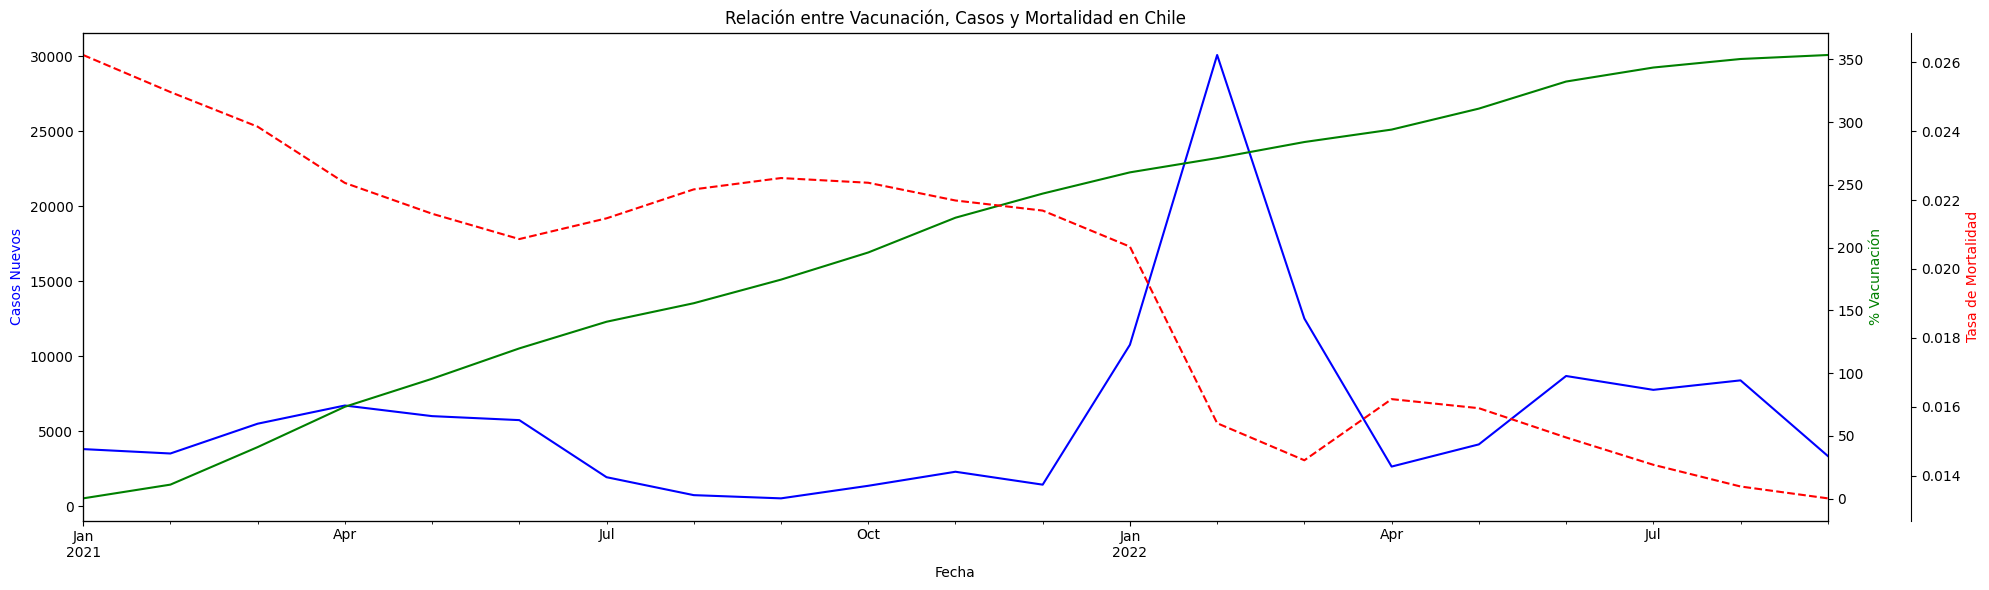

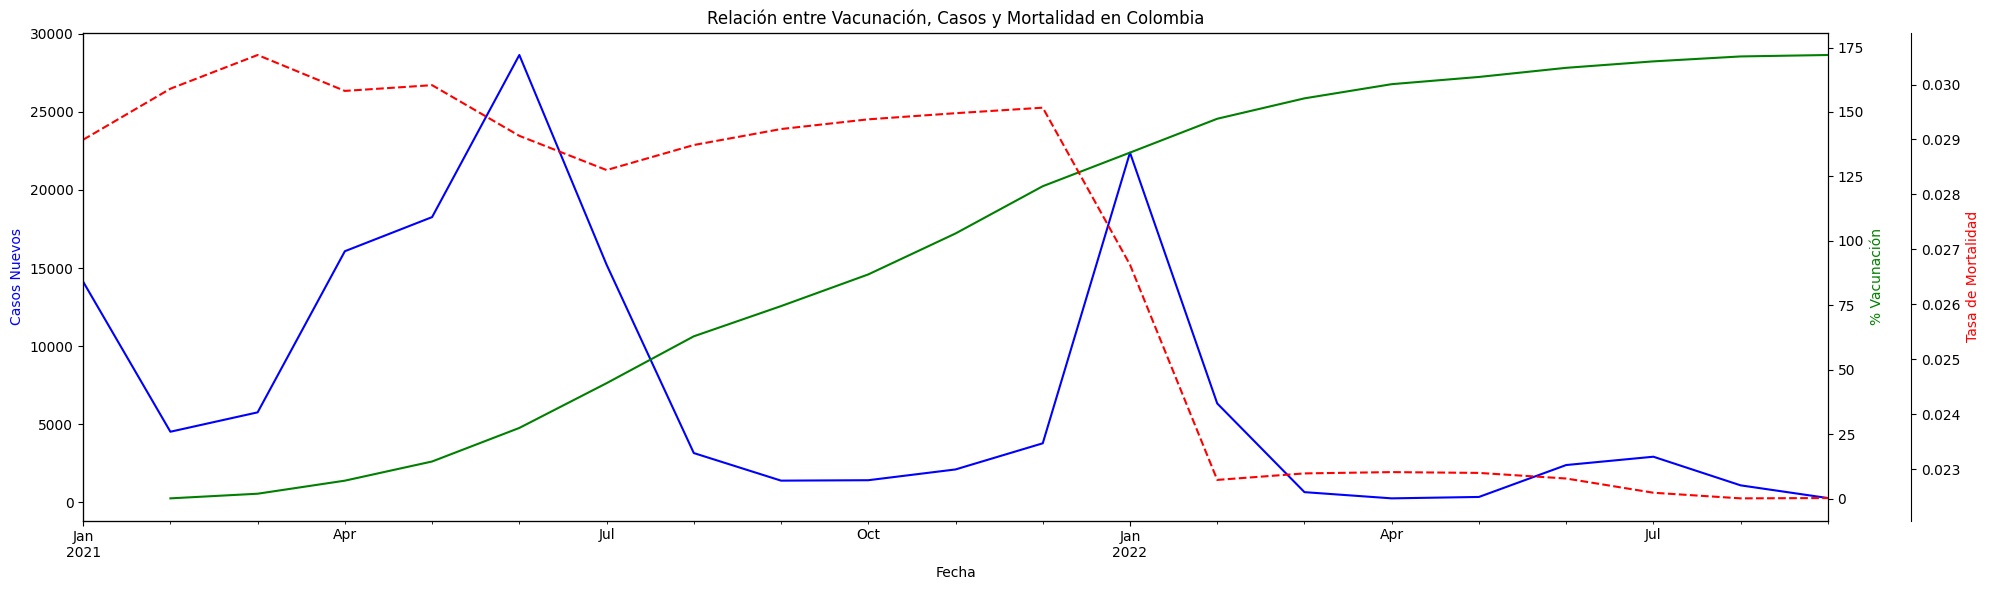

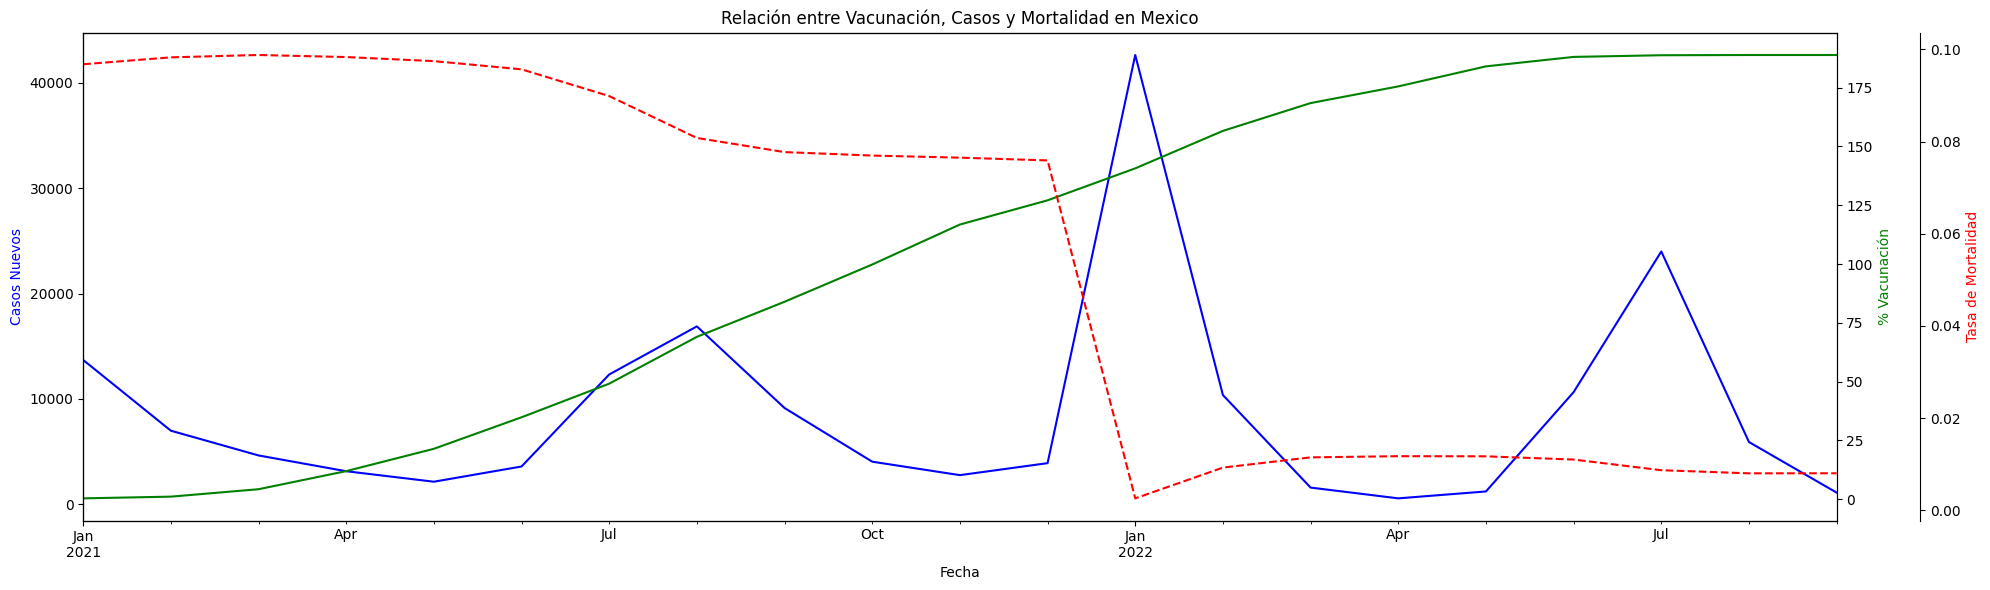

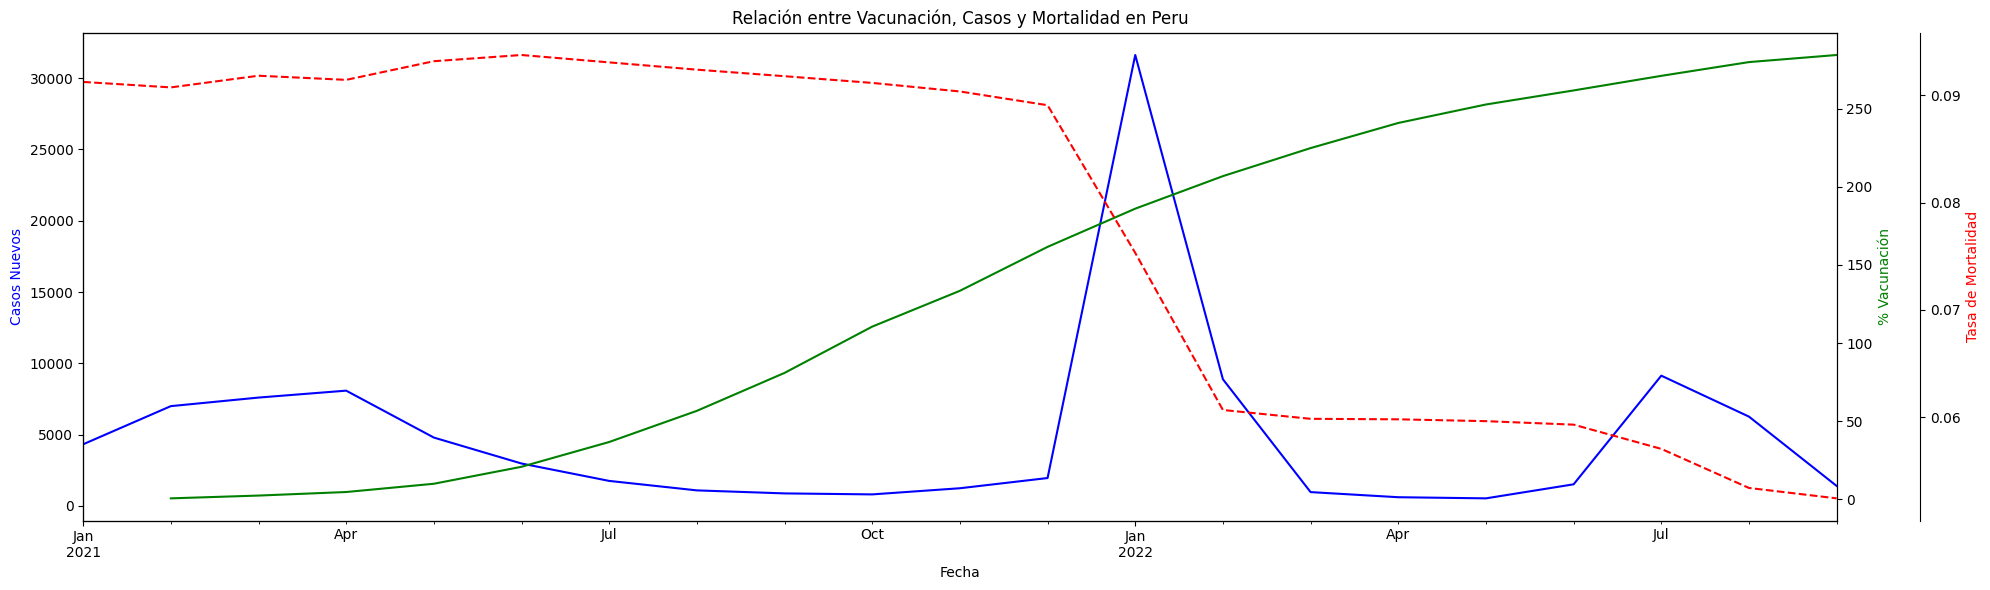

In [46]:
# Aseguro columnas derivadas
df_limpio['percentage_vaccinated'] = (
    df_limpio['cumulative_vaccine_doses_administered'] / df_limpio['population'] * 100
)
df_limpio['mortality_rate'] = (
    df_limpio['cumulative_deceased'] / df_limpio['cumulative_confirmed']
)

# Iterar por país
for country in df_limpio['country_name'].unique():
    df_country = df_limpio[df_limpio['country_name'] == country]

    # resample mensual (ME = end of month)
    df_monthly = df_country.resample('ME').mean(numeric_only=True)

    # Crear figura y ejes
    fig, ax1 = plt.subplots(figsize=(20, 6))
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()

    

    # Plots
    df_monthly['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
    df_monthly['percentage_vaccinated'].plot(ax=ax2, color='green', label='% Vacunación')
    df_monthly['mortality_rate'].plot(ax=ax3, color='red', linestyle='--', label='Tasa de Mortalidad')

    # Etiquetas
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Casos Nuevos', color='blue')
    ax2.set_ylabel('% Vacunación', color='green')
    ax3.set_ylabel('Tasa de Mortalidad', color='red')
    # Para que el tercer eje no se superponga con el segundo:
    ax3.spines['right'].set_position(('outward', 60))
    # Título y leyendas
    ax1.set_title(f'Relación entre Vacunación, Casos y Mortalidad en {country}')

    plt.tight_layout()
    plt.show()

A Perú le constó controlar los casos de muerte en toda la fase inicial. Parece haber mayor número de casos también frente a los otros países.

Demuestro en el gráfico siguiente este comportamiento

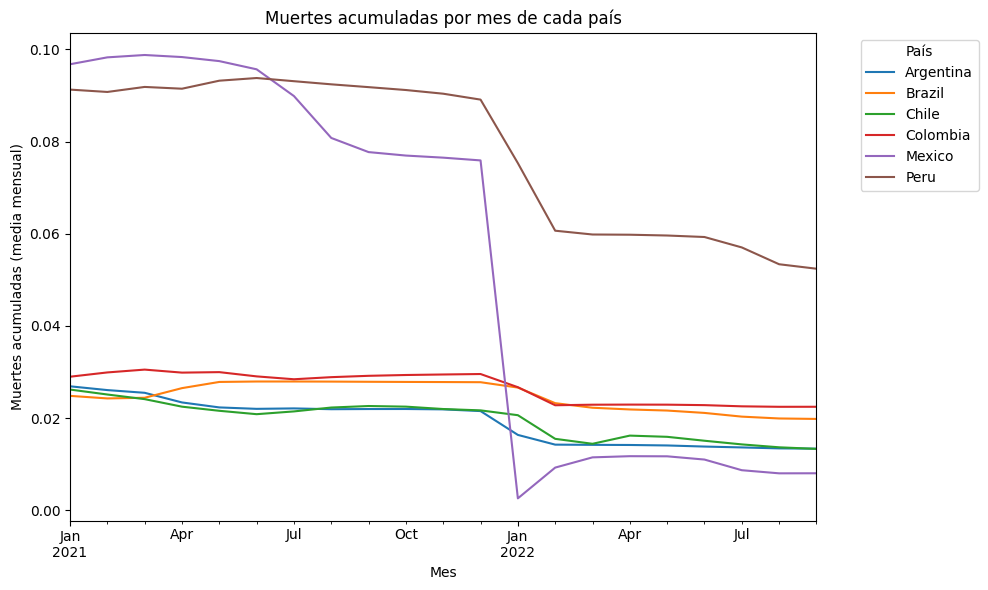

In [47]:
df_limpio['mortality_rate'] = (
    df_limpio['cumulative_deceased'] / df_limpio['cumulative_confirmed']
)

# Gráfica de la evolución mensual de muertes acumuladas por país 
fig, ax = plt.subplots (figsize=(10, 6))

# Iterar sobre cada país y graficar la media mensual de muertes acumuladas
for pais in  df_limpio['country_name'].unique():

    # Filtrar datos por país y hacer resample mensual (fin de mes)
    datos_pais = df_limpio[df_limpio['country_name'] == pais].resample('ME').mean(numeric_only=True)
    # Graficar la serie temporal de muertes acumuladas
    datos_pais['mortality_rate'].plot(ax=ax, label=pais)
# Configurar el título y las etiquetas
plt.title('Muertes acumuladas por mes de cada país')
plt.xlabel('Mes')
plt.ylabel('Muertes acumuladas (media mensual)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.tight_layout()
plt.show()

## Análisis de variables ambientales

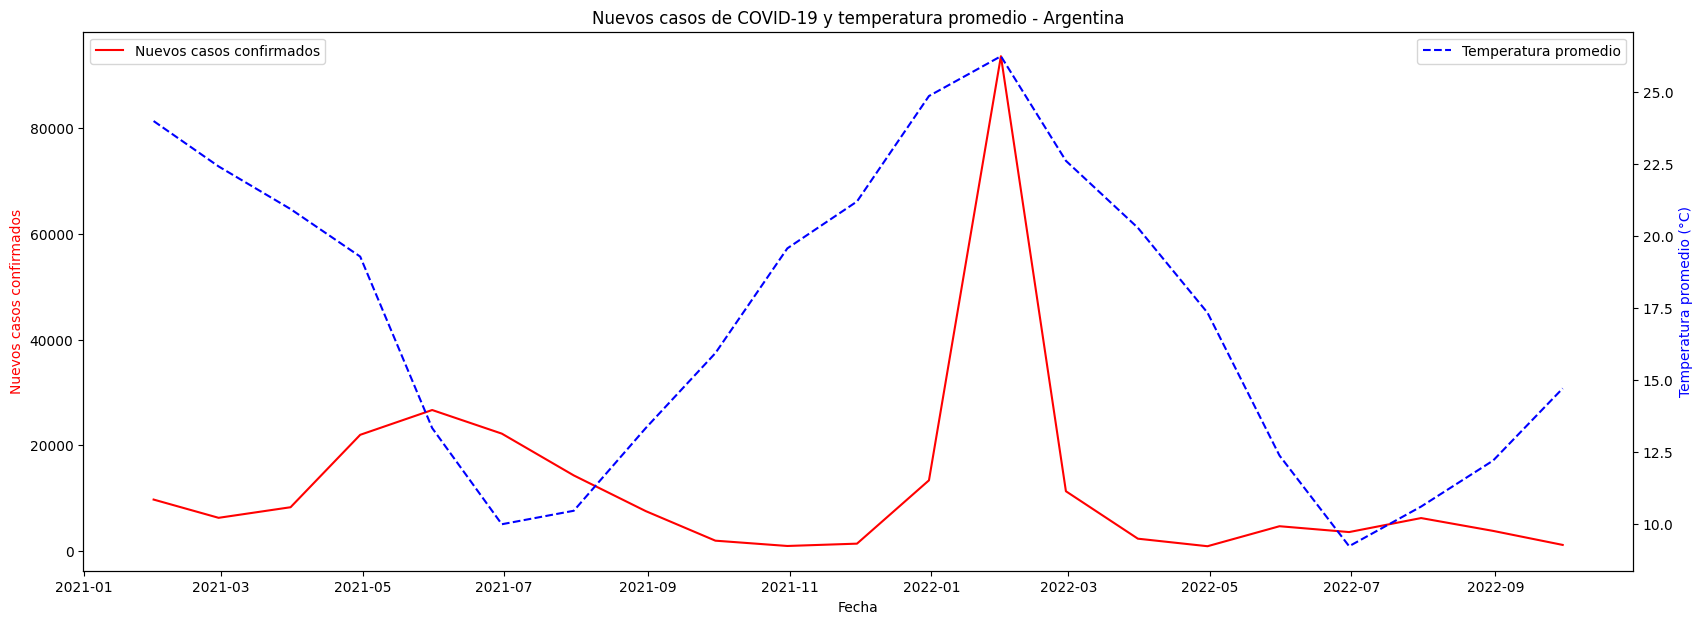

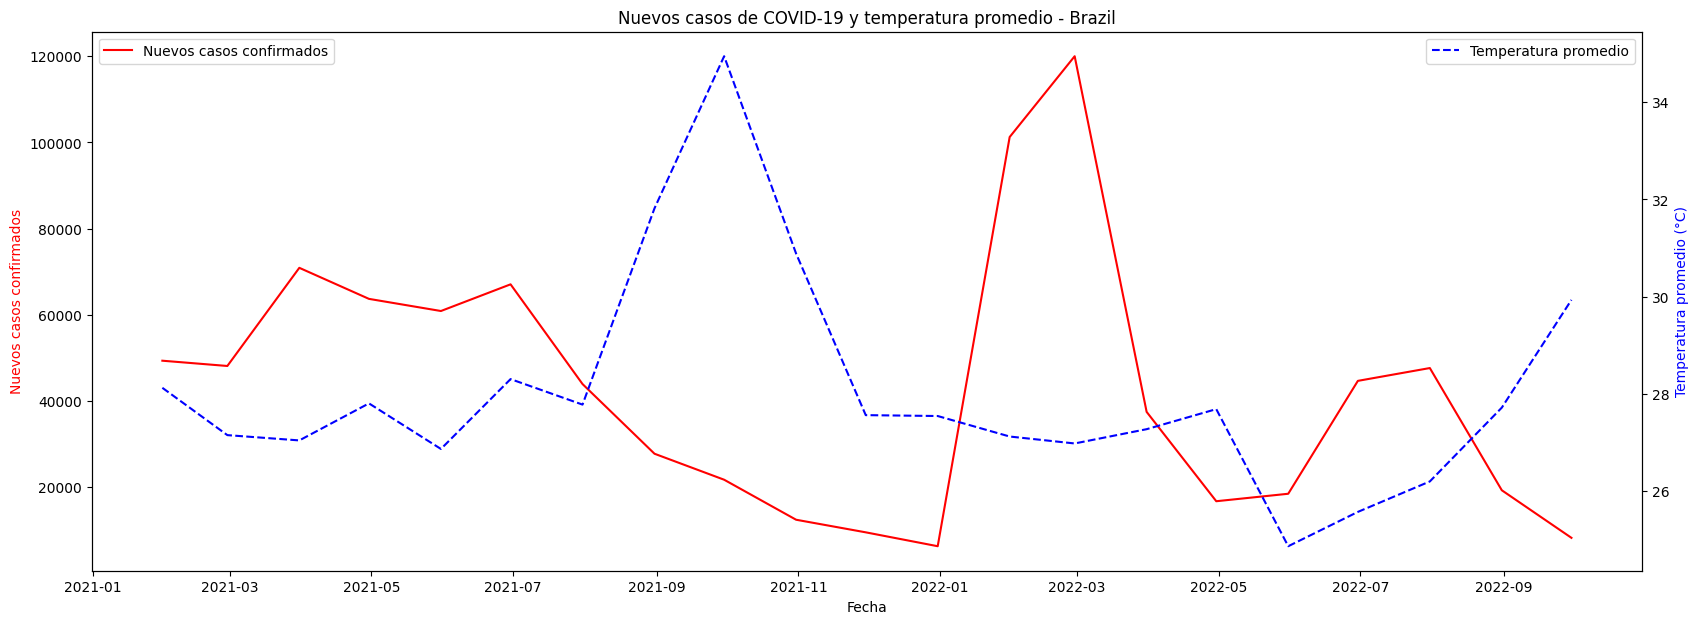

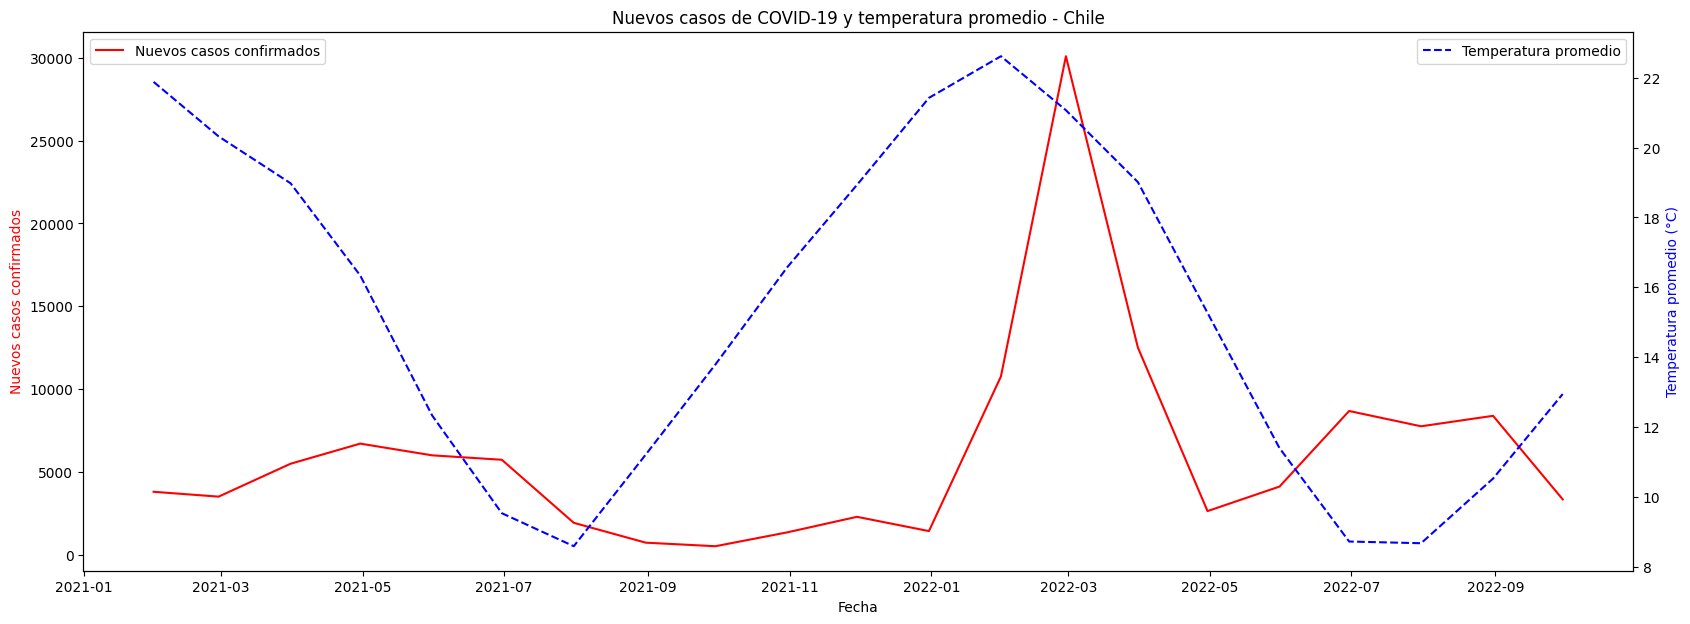

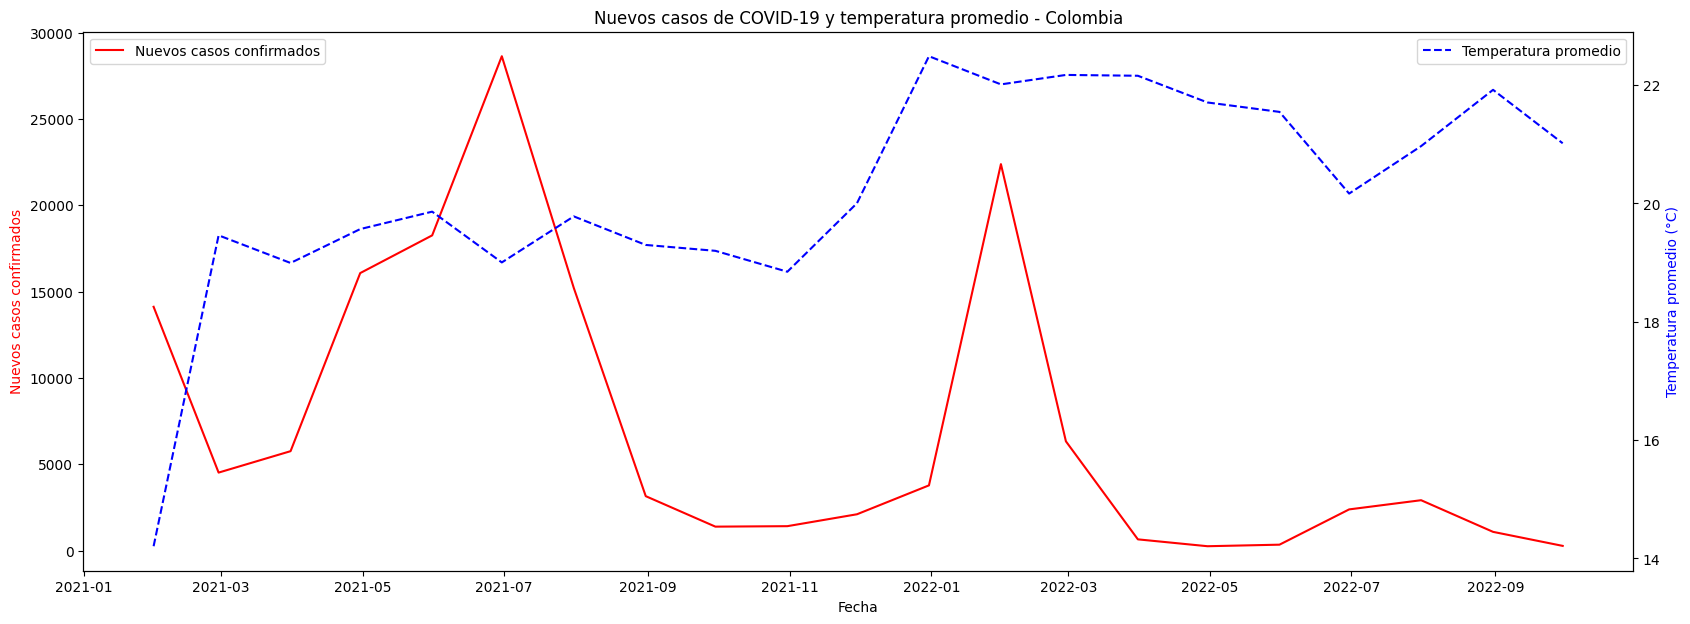

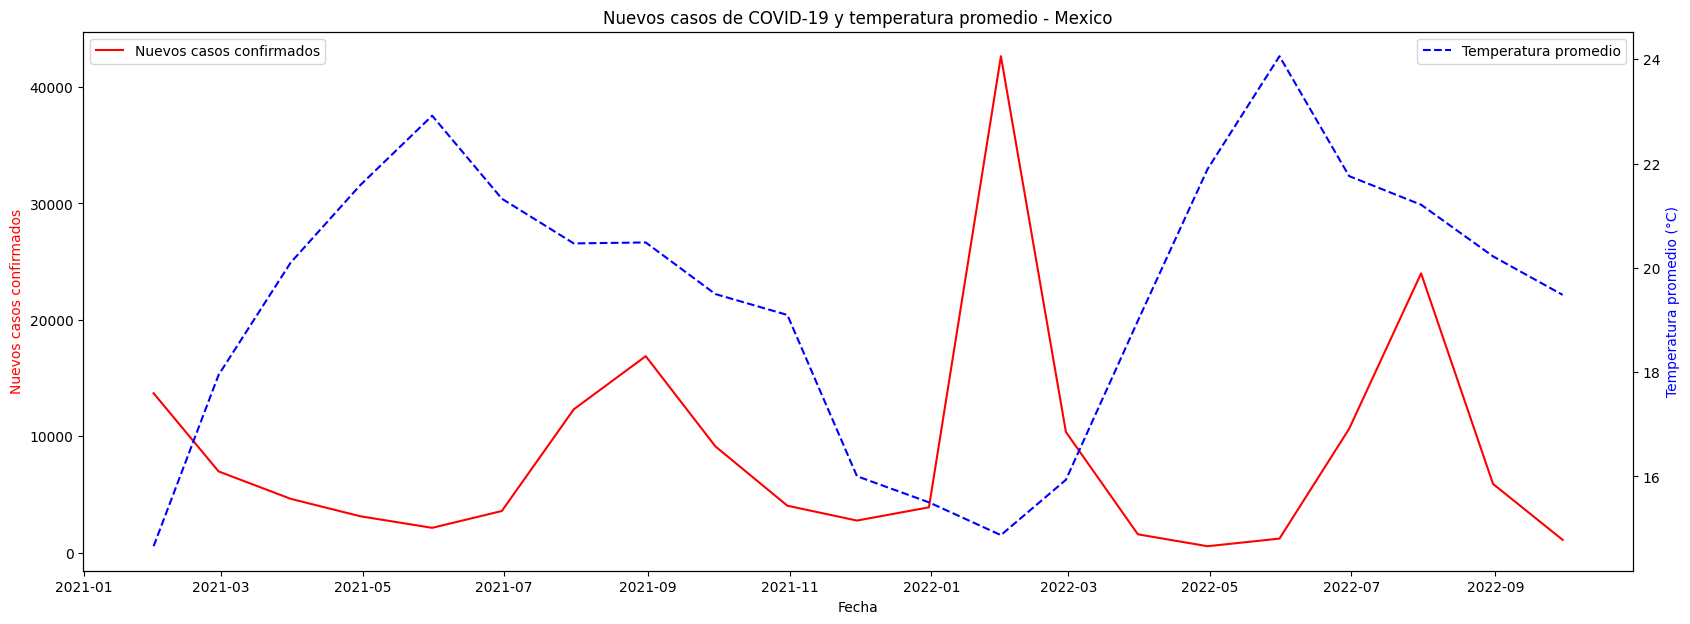

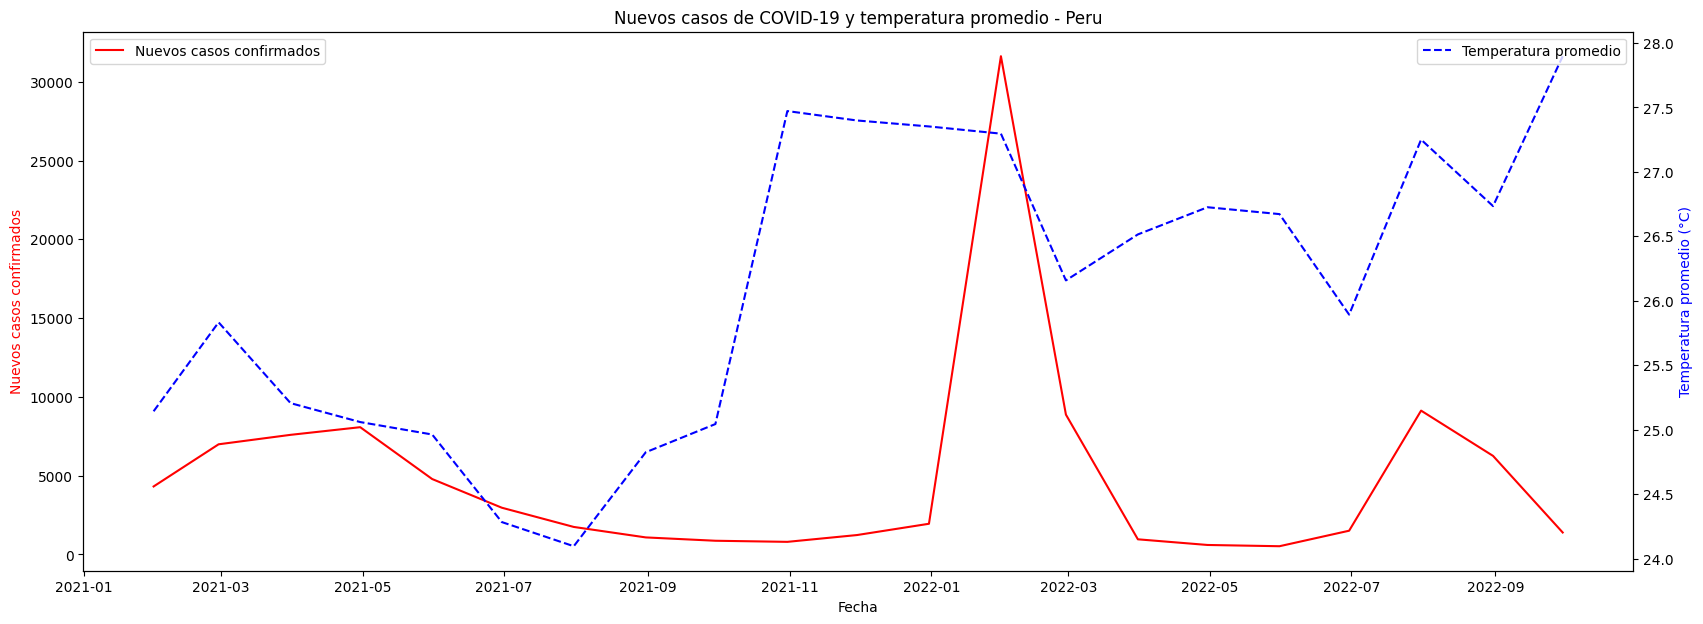

In [48]:
# Analizo la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19 por cada país
for pais in df_limpio['country_name'].unique():
    df_pais = df_limpio[df_limpio['country_name'] == pais]
    
    # Resampleo mensual por país
    promedio_mensual = df_pais.resample('ME').mean(numeric_only=True)
    
    # Crear gráfico
    plt.figure(figsize=(20, 7))
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    ax1.plot(promedio_mensual.index, promedio_mensual['new_confirmed'], 
             color='red', label='Nuevos casos confirmados')
    ax2.plot(promedio_mensual.index, promedio_mensual['average_temperature_celsius'], 
             color='blue', linestyle='--', label='Temperatura promedio')
    
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Nuevos casos confirmados', color='red')
    ax2.set_ylabel('Temperatura promedio (°C)', color="blue")
    plt.title(f'Nuevos casos de COVID-19 y temperatura promedio - {pais}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()

Sólo en Argentina parece coincidir el pico de temperaturas con el pico de casos nuevos, en los demás países no parece haber una relación clara entre ambas variables.

## Análisis de Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

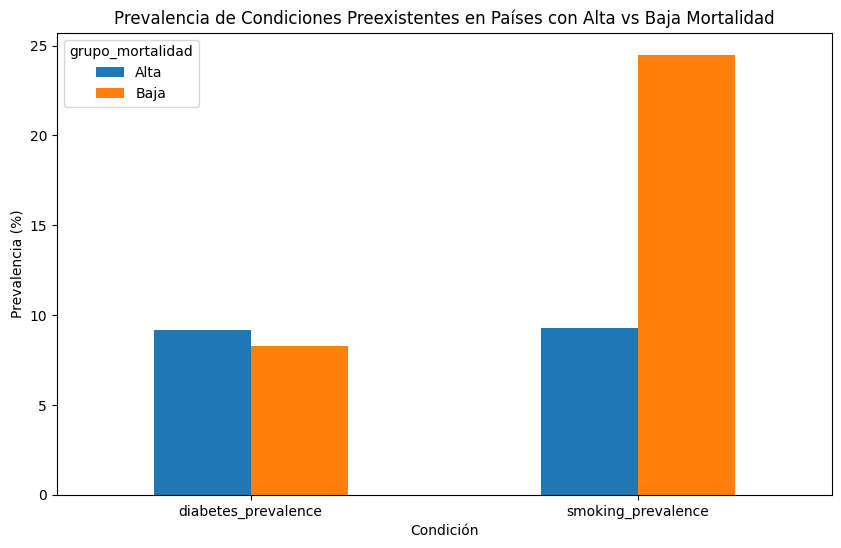

In [49]:
# Análisis de Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
# Calculo las medidas
df_mortalidad = df_limpio.groupby("country_name").agg({
    "cumulative_deceased":"max",
    "cumulative_confirmed":"max",
    "diabetes_prevalence":"mean",
    "smoking_prevalence":"mean"
}).reset_index()

df_mortalidad["mortality_rate"] = df_mortalidad["cumulative_deceased"] / df_mortalidad["cumulative_confirmed"]
mediana = df_mortalidad["mortality_rate"].median()
df_mortalidad["grupo_mortalidad"] = df_mortalidad["mortality_rate"].apply(lambda x: "Alta" if x > mediana else "Baja")

# defino las variables a analizar
condiciones = ["diabetes_prevalence","smoking_prevalence"]
df_condiciones = df_mortalidad.groupby("grupo_mortalidad")[condiciones].mean().T

df_condiciones.plot(kind="bar", figsize=(10,6))
plt.title("Prevalencia de Condiciones Preexistentes en Países con Alta vs Baja Mortalidad")
plt.ylabel("Prevalencia (%)")
plt.xlabel("Condición")
plt.xticks(rotation=0)
plt.show()

No parece haber una relación entre las condiciones pre existentes y la tasa de mortalidad.